# Import Libraries

In [9]:
import pandas as pd
import re
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime

# Load Dataset

In [10]:
# Directories
data_dir = '../data'
raw_data_dir = f'{data_dir}/raw'

# Dataset name and path
dataset_name = 'mudah_apartment_kl_selangor.csv'
dataset_path = f'{raw_data_dir}/{dataset_name}'

# Load dataframe
df = pd.read_csv(dataset_path)

# Initial Review

### Dimensions
rows, cols

In [11]:
df.shape

(19991, 14)

### Head
First few records

In [12]:
df.head()

,ads_id,prop_name,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region
0,100323185,The Hipster @ Taman Desa,2022.0,RM 4 200 per month,Kuala Lumpur - Taman Desa,Condominium,5,2.0,6.0,1842 sq.ft.,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur
1,100203973,Segar Courts,NaN,RM 2 300 per month,Kuala Lumpur - Cheras,Condominium,3,1.0,2.0,1170 sq.ft.,Partially Furnished,"Playground, Parking, Barbeque area, Security, ...","Air-Cond, Cooking Allowed, Near KTM/LRT",Kuala Lumpur
2,100323128,Pangsapuri Teratak Muhibbah 2,NaN,RM 1 000 per month,Kuala Lumpur - Taman Desa,Apartment,3,NaN,2.0,650 sq.ft.,Fully Furnished,"Minimart, Jogging Track, Lift, Swimming Pool",NaN,Kuala Lumpur
3,100191767,Sentul Point Suite Apartment,2020.0,RM 1 700 per month,Kuala Lumpur - Sentul,Apartment,2,1.0,2.0,743 sq.ft.,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Cou...","Cooking Allowed, Near KTM/LRT, Washing Machine",Kuala Lumpur
4,97022692,Arte Mont Kiara,NaN,RM 1 299 per month,Kuala Lumpur - Mont Kiara,Service Residence,1,1.0,1.0,494 sq.ft.,Not Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...",Air-Cond,Kuala Lumpur


### Features
There are 14 features with one unique ID (ads_id) and one target feature (monthly_rent).
| No | Feature | Description | Type |
| - | - | - | - |
| 1 | `ads_id` | the listing ids (unique) | Categorical |
| 2 | `prop_name` | name of the building/property | Categorical |
| 3 | `completion_year` | completion/ established year of the property | Numerical |
| 4 | `monthly_rent` | monthly rent in ringgit malaysia (RM) | Numerical |
| 5 | `location` | property location in Kuala Lumpur region | Categorical |
| 6 | `property_type` | property type such as apartment, condominium, flat, duplex, studio, etc | Categorical |
| 7 | `rooms` | number of rooms in the unit | Numerical |
| 8 | `parking` | number of parking space for the unit | Numerical |
| 9 | `bathroom` | number of bathrooms in the unit | Numerical | Numerical |
| 10 | `size` | total area of the unit in square feet | Numerical |
| 11 | `furnished` | furnishing status of the unit (fully, partial, non-furnished) | Categorical |
| 12 | `facilities` | main facilities available | Categorical (to split into Binary) |
| 13 | `additional_facilities` | additional facilities (proximity to attraction area, mall, school, shopping, railways, etc) | Categorical (to split into Binary) |
| 14 | `region` | Kuala Lumpur or Selangor | Categorical |

In [13]:
list(df.columns)

['ads_id',
 'prop_name',
 'completion_year',
 'monthly_rent',
 'location',
 'property_type',
 'rooms',
 'parking',
 'bathroom',
 'size',
 'furnished',
 'facilities',
 'additional_facilities',
 'region']

### Data Types

In [14]:
df.dtypes

ads_id                     int64
prop_name                 object
completion_year          float64
monthly_rent              object
location                  object
property_type             object
rooms                     object
parking                  float64
bathroom                 float64
size                      object
furnished                 object
facilities                object
additional_facilities     object
region                    object
dtype: object

### Missing Values

In [15]:
df.isna().sum()

ads_id                      0
prop_name                 948
completion_year          9185
monthly_rent                2
location                    0
property_type               0
rooms                       6
parking                  5702
bathroom                    6
size                        0
furnished                   5
facilities               2209
additional_facilities    5948
region                      0
dtype: int64

### Unique Values

In [16]:
print(f'prop_name: {len(df['prop_name'].unique())}')
print(f'completion_year: {len(df['completion_year'].unique())}')
print(f'location: {len(df['location'].unique())}')
print(f'property_type: {len(df['property_type'].unique())}')
print(f'rooms: {len(df['rooms'].unique())}')
print(f'parking: {len(df['parking'].unique())}')
print(f'bathroom: {len(df['bathroom'].unique())}')
print(f'size: {len(df['size'].unique())}')
print(f'furnished: {len(df['furnished'].unique())}')
print(f'facilities: {len(df['facilities'].unique())}')
print(f'additional_facilities: {len(df['additional_facilities'].unique())}')
print(f'region: {len(df['region'].unique())}')

prop_name: 2827
completion_year: 43
location: 134
property_type: 13
rooms: 19
parking: 10
bathroom: 9
size: 1215
furnished: 4
facilities: 10786
additional_facilities: 177
region: 2


In [17]:
#print(f'prop_name: {df['prop_name'].unique()}')
print(f'\ncompletion_year: {df['completion_year'].unique()}')
#print(f'\nlocation: {df['location'].unique()}')
print(f'\nproperty_type: {df['property_type'].unique()}')
print(f'\nrooms: {df['rooms'].unique()}')
print(f'\nparking: {df['parking'].unique()}')
print(f'\nbathroom: {df['bathroom'].unique()}')
print(f'\nsize: {df['size'].unique()}')
print(f'\nfurnished: {df['furnished'].unique()}')
#print(f'\nfacilities: {df['facilities'].unique()}')
#print(f'\nadditional_facilities: {df['additional_facilities'].unique()}')
print(f'\nregion: {df['region'].unique()}')


completion_year: [2022.   nan 2020. 2018. 2014. 2019. 2017. 2021. 2006. 2015. 1999. 2004.
 2007. 2002. 1985. 2010. 2012. 1988. 1998. 2023. 1990. 2016. 2003. 2000.
 2008. 1995. 2013. 2011. 1994. 2009. 1996. 2005. 1993. 1997. 2001. 2025.
 1980. 1989. 1987. 1984. 2024. 1991. 1977.]

property_type: ['Condominium' 'Apartment' 'Service Residence' 'Studio' 'Flat' 'Duplex'
 'Others' 'Townhouse Condo'
 'Condo / Services residence / Penthouse / Townhouse' 'Residential'
 'Bungalow House' 'Houses' 'Soho']

rooms: ['5' '3' '2' '1' '4' '7' '6' 'More than 10' nan '9' '3.0' '4.0' '2.0'
 '1.0' '5.0' '9.0' '6.0' '7.0' '10.0']

parking: [ 2.  1. nan  3. 10.  5.  4.  9.  6.  7.]

bathroom: [ 6.  2.  1.  3.  5.  4.  7. nan  8.]

size: ['1842 sq.ft.' '1170 sq.ft.' '650 sq.ft.' ... '489 sq.ft.' '941 sq.ft.'
 '1261 sq.ft.']

furnished: ['Fully Furnished' 'Partially Furnished' 'Not Furnished' nan]

region: ['Kuala Lumpur' 'Selangor']


In [18]:
print(f'prop_name: {df['prop_name'].unique()}')
print(f'\nlocation: {df['location'].unique()}')
print(f'\nfacilities: {df['facilities'].unique()}')
print(f'\nadditional_facilities: {df['additional_facilities'].unique()}')

prop_name: ['The Hipster @ Taman Desa' 'Segar Courts' 'Pangsapuri Teratak Muhibbah 2'
 ... 'Pangsapuri Desa Mas Taman Desa Mas Bandar Country Homes'
 'Pangsapuri Meru Ehsan' 'Residensi Lili']

location: ['Kuala Lumpur - Taman Desa' 'Kuala Lumpur - Cheras'
 'Kuala Lumpur - Sentul' 'Kuala Lumpur - Mont Kiara'
 'Kuala Lumpur - Setapak' 'Kuala Lumpur - Ampang'
 'Kuala Lumpur - Segambut' 'Kuala Lumpur - Desa ParkCity'
 'Kuala Lumpur - Bukit Jalil' 'Kuala Lumpur - Kepong'
 'Kuala Lumpur - KL City' 'Kuala Lumpur - Wangsa Maju'
 'Kuala Lumpur - Solaris Dutamas' 'Kuala Lumpur - Jalan Kuching'
 'Kuala Lumpur - Bandar Menjalara' 'Kuala Lumpur - Desa Pandan'
 'Kuala Lumpur - Old Klang Road' 'Kuala Lumpur - KLCC'
 'Kuala Lumpur - Ampang Hilir' 'Kuala Lumpur - Bukit Bintang'
 'Kuala Lumpur - Jalan Ipoh' 'Kuala Lumpur - Setiawangsa'
 'Kuala Lumpur - Gombak' 'Kuala Lumpur - Pantai'
 'Kuala Lumpur - Sungai Besi' 'Kuala Lumpur - Jinjang'
 'Kuala Lumpur - Sri Petaling' 'Kuala Lumpur - Bangsar South'
 'Ku

### Duplicates

In [19]:
# Listing ID (ads_id) must be unique
total_rows = len(df)
unique_rows = df['ads_id'].nunique()

print(f'Number of rows: {len(df)}')
print(f'Number of unique rows: {df['ads_id'].nunique()}')
print(f'Number of duplicates: {total_rows - unique_rows}')

Number of rows: 19991
Number of unique rows: 19978
Number of duplicates: 13


### Statistical Summary

In [20]:
df.describe()

,ads_id,completion_year,parking,bathroom
count,1.999100e+04,10806.000000,14289.000000,19985.000000
mean,9.970671e+07,2014.822321,1.416824,1.891719
std,3.482575e+06,6.735355,0.567368,0.556266
min,1.652551e+07,1977.000000,1.000000,1.000000
25%,9.984012e+07,2012.000000,1.000000,2.000000
50%,1.002127e+08,2017.000000,1.000000,2.000000
75%,1.006179e+08,2020.000000,2.000000,2.000000
max,1.008546e+08,2025.000000,10.000000,8.000000


## Initial Analysis

In [21]:
def plot_barv(data, title, xlabel, ylabel, width=10, height=6):
    plt.figure(figsize=(width, height))
    data.plot(kind='bar', title=title, xlabel=xlabel, ylabel=ylabel)
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

def plot_barh(data, title, xlabel, ylabel, width=10, height=6):
    plt.figure(figsize=(width, height))
    data.plot(kind='barh', title=title, xlabel=xlabel, ylabel=ylabel)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_scatter(data, title, xlabel, ylabel, width=10, height=6):
    plt.figure(figsize=(width, height))
    data.plot.scatter(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Property Distribution

`completion_year`

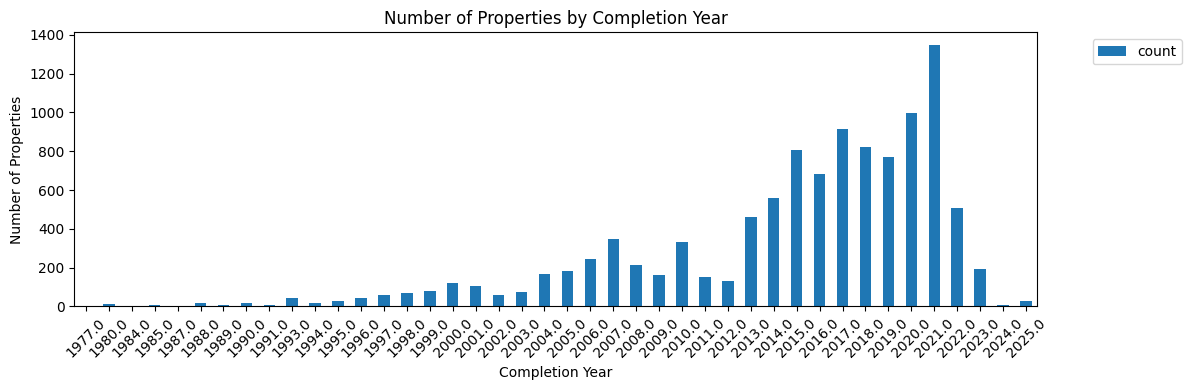

In [22]:
property_counts = df['completion_year'].value_counts().sort_index()
plot_barv(property_counts, 'Number of Properties by Completion Year', 'Completion Year', 'Number of Properties', 12, 4)

`location`

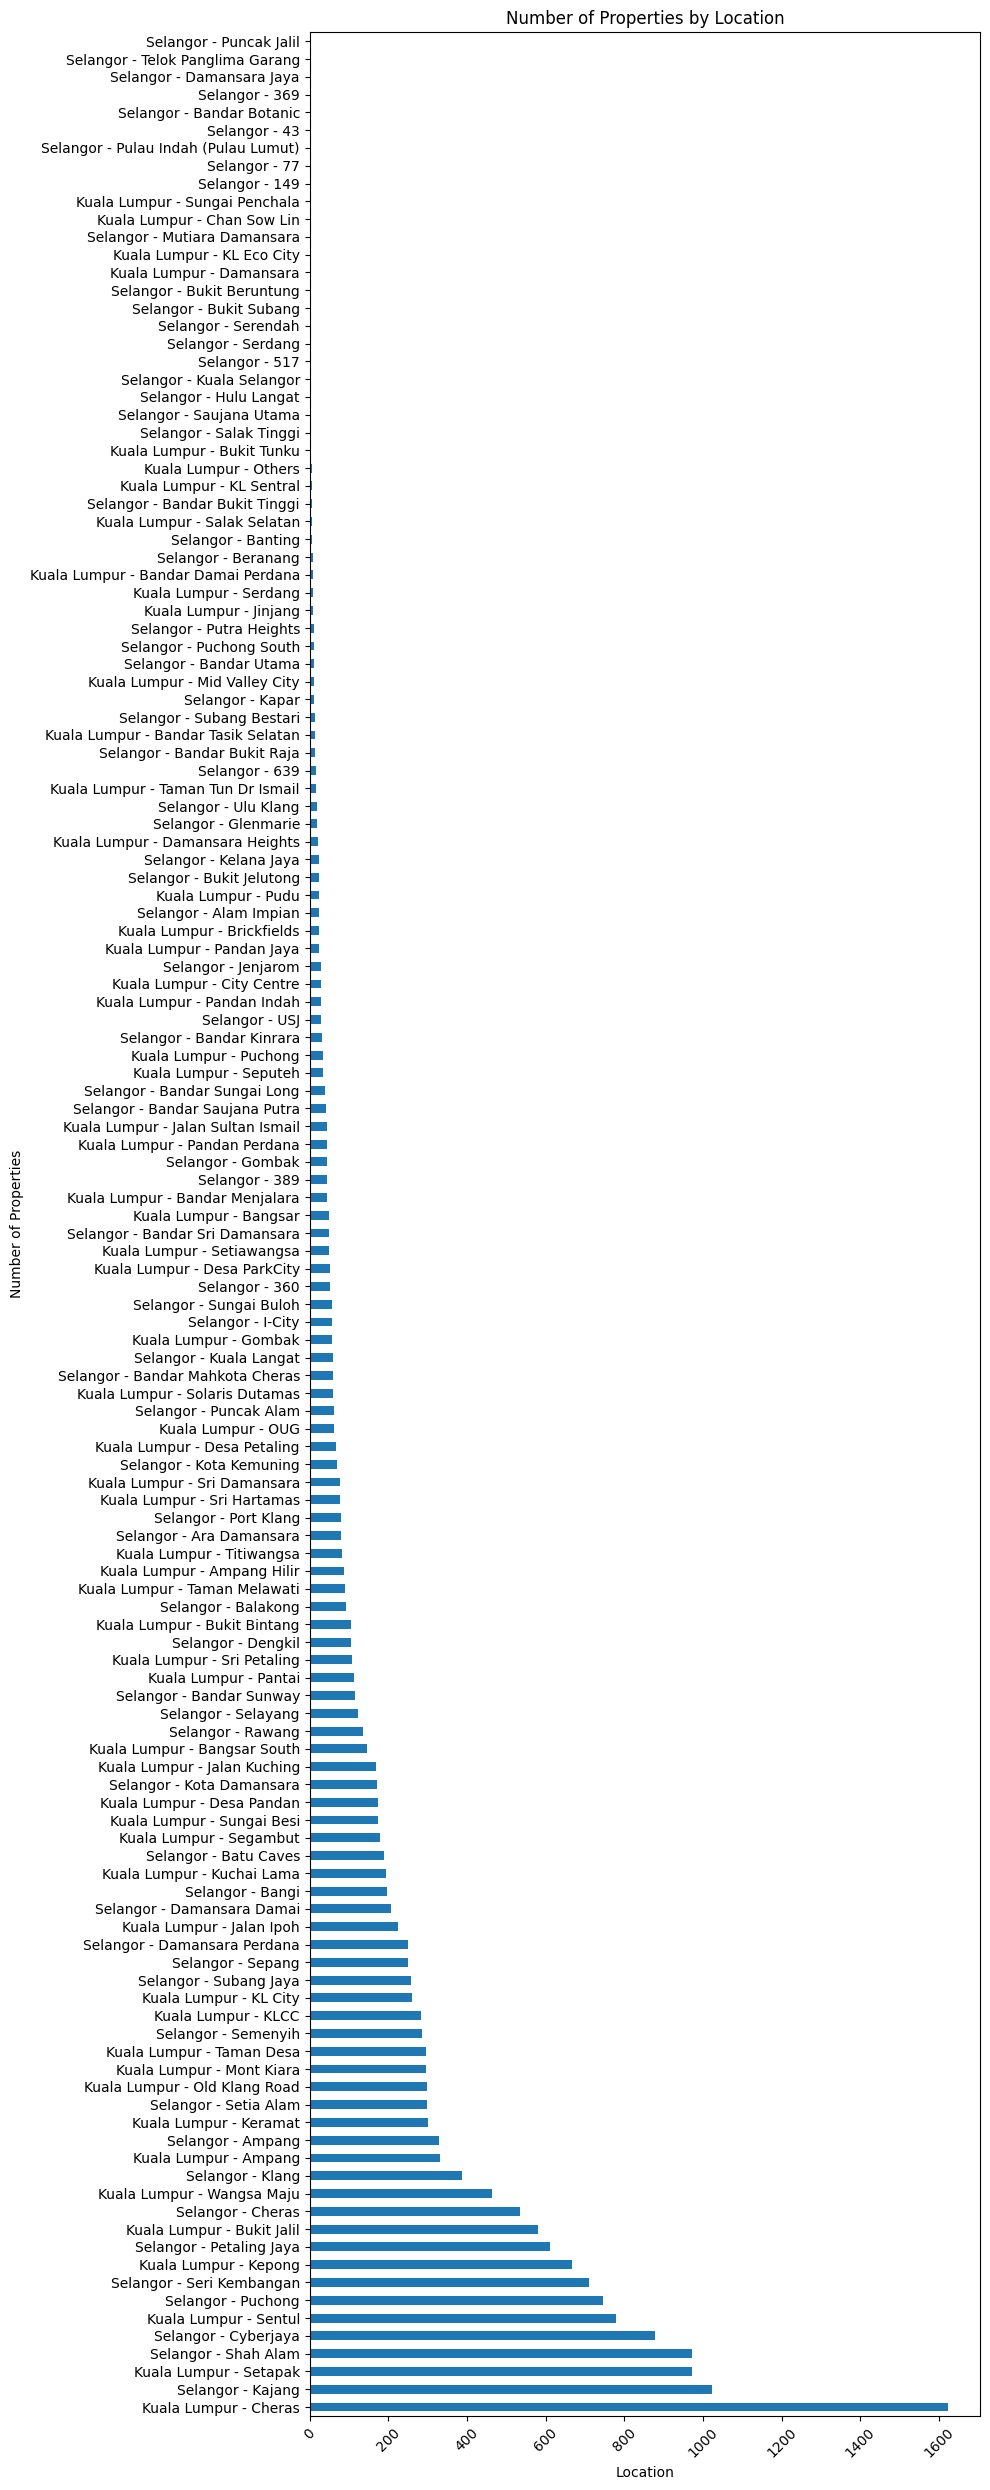

In [23]:
property_counts = df['location'].value_counts()
plot_barh(property_counts, 'Number of Properties by Location', 'Location', 'Number of Properties', 10, 25)

`property_type`

Findings: can combine categories with only 1 row into "Others" category

property_type
Condominium                                           8448
Service Residence                                     5310
Apartment                                             5258
Flat                                                   581
Studio                                                 189
Others                                                  89
Duplex                                                  76
Townhouse Condo                                         35
Condo / Services residence / Penthouse / Townhouse       1
Residential                                              1
Bungalow House                                           1
Houses                                                   1
Soho                                                     1
Name: count, dtype: int64


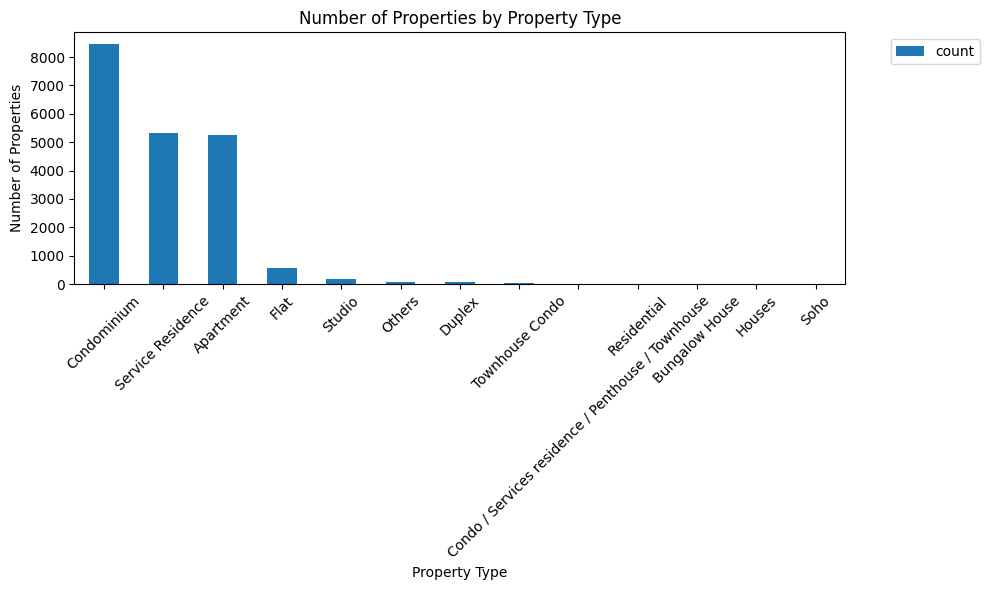

In [24]:
property_counts = df['property_type'].value_counts()
print(property_counts)
plot_barv(property_counts, 'Number of Properties by Property Type', 'Property Type', 'Number of Properties', 10, 6)

`rooms`

rooms
1                867
1.0             1527
10.0               1
2               1805
2.0             1489
3               6320
3.0             6460
4                915
4.0              474
5                 54
5.0               38
6                 19
6.0                4
7                  6
7.0                2
9                  1
9.0                1
More than 10       2
Name: count, dtype: int64


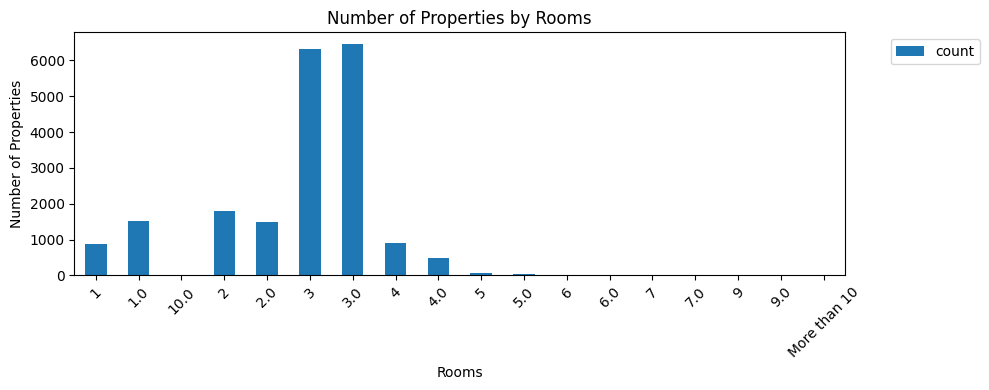

In [25]:
property_counts = df['rooms'].value_counts().sort_index()
print(property_counts)
plot_barv(property_counts, 'Number of Properties by Rooms', 'Rooms', 'Number of Properties', 10, 4)

`parking`

parking
1.0     8644
2.0     5427
3.0      179
4.0       23
5.0        6
6.0        2
7.0        1
9.0        1
10.0       6
Name: count, dtype: int64


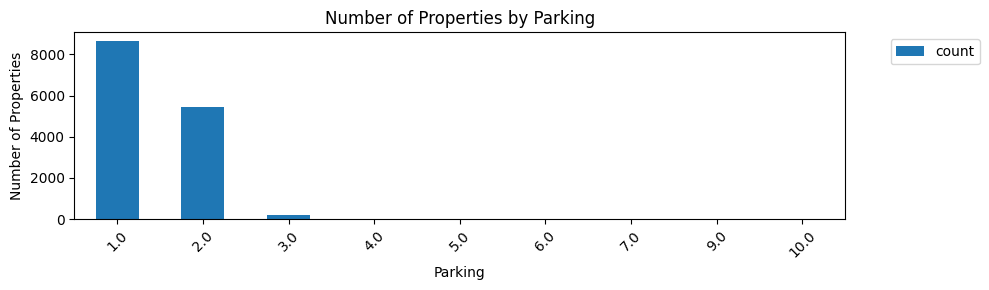

In [26]:
property_counts = df['parking'].value_counts().sort_index()
print(property_counts)
plot_barv(property_counts, 'Number of Properties by Parking', 'Parking', 'Number of Properties', 10, 3)

`bathroom`

bathroom
1.0     3800
2.0    14887
3.0     1065
4.0      160
5.0       54
6.0        9
7.0        7
8.0        3
Name: count, dtype: int64


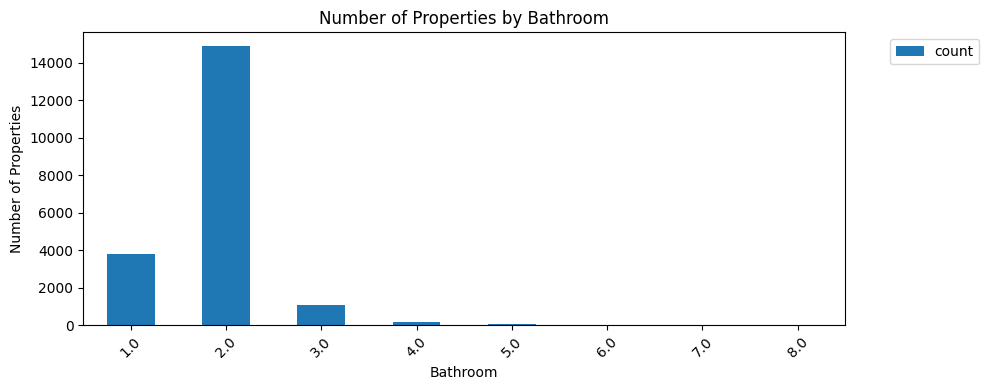

In [27]:
property_counts = df['bathroom'].value_counts().sort_index()
print(property_counts)
plot_barv(property_counts, 'Number of Properties by Bathroom', 'Bathroom', 'Number of Properties', 10, 4)

`furnished`

furnished
Fully Furnished        8462
Not Furnished          3520
Partially Furnished    8004
Name: count, dtype: int64


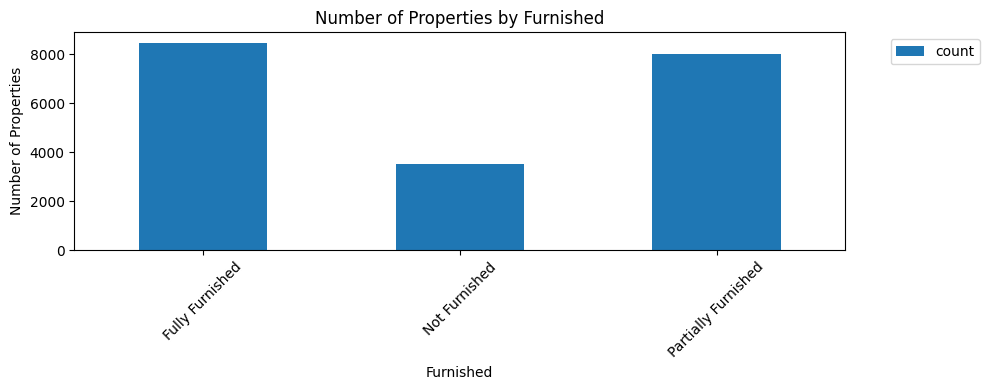

In [28]:
property_counts = df['furnished'].value_counts().sort_index()
print(property_counts)
plot_barv(property_counts, 'Number of Properties by Furnished', 'Furnished', 'Number of Properties', 10, 4)

`region`

region
Kuala Lumpur     9991
Selangor        10000
Name: count, dtype: int64


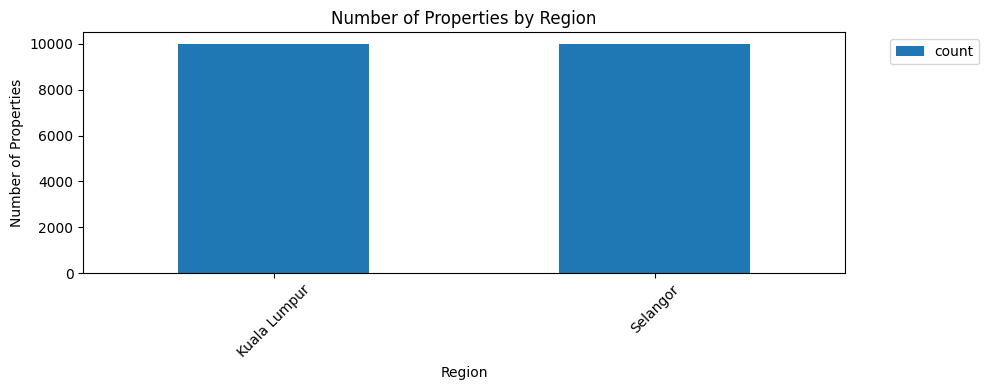

In [29]:
property_counts = df['region'].value_counts().sort_index()
print(property_counts)
plot_barv(property_counts, 'Number of Properties by Region', 'Region', 'Number of Properties', 10, 4)

### Numerical Feature Analysis

- `monthly_rent`: unable to visualize due to string format
- `size`: unable to visualize due to string format
- `monthly_rent` vs `completion_year`: unable to visualize due to string format

### Categorical Feature Analysis

Relationships between Categorical features and `monthly_rent`: unable to visualize due to string format

`parking` - `property_type`

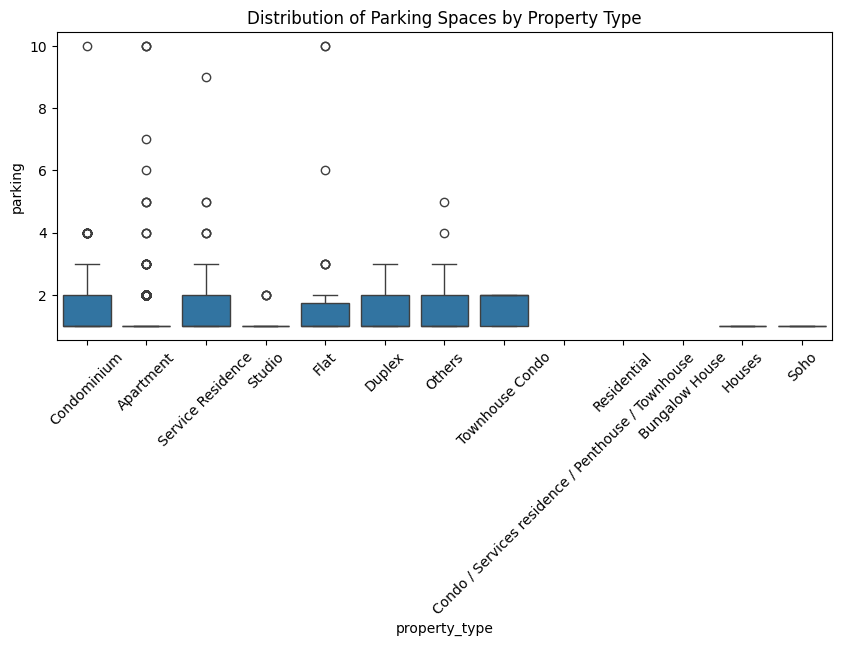

In [30]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='property_type', y='parking', data=df)
plt.xticks(rotation=45)
plt.title('Distribution of Parking Spaces by Property Type')
plt.show()

In [31]:
parking_stats = df.groupby('property_type')['parking'].agg(
    mode=lambda x: x.mode()[0] if not x.mode().empty else None,
    median='median',
    mean='mean'
)
print(parking_stats)

                                                    mode  median      mean
property_type                                                             
Apartment                                            1.0     1.0  1.258663
Bungalow House                                       NaN     NaN       NaN
Condo / Services residence / Penthouse / Townhouse   NaN     NaN       NaN
Condominium                                          1.0     1.0  1.468301
Duplex                                               1.0     1.0  1.368421
Flat                                                 1.0     1.0  1.457627
Houses                                               1.0     1.0  1.000000
Others                                               1.0     1.0  1.583333
Residential                                          NaN     NaN       NaN
Service Residence                                    1.0     1.0  1.467304
Soho                                                 1.0     1.0  1.000000
Studio                   

# Data Preprocessing

## Data Cleaning (1)
Preliminary data cleaning to kickstart preprocessing

### Drop Duplicates
Drop duplicate rows based on `ads_id`

In [32]:
df_dropdupe = df.drop_duplicates(subset=['ads_id'], keep='first')

print(f'Number of rows after duplicates dropped: {len(df_dropdupe)}')
print(f'Number of unique rows: {df_dropdupe['ads_id'].nunique()}')
print(f'Number of duplicate rows: {df_dropdupe.duplicated().sum()}')

Number of rows after duplicates dropped: 19978
Number of unique rows: 19978
Number of duplicate rows: 0


### Drop Columns
Drop irrelevant columns
- `ads_id`: does not contribute to `monthly_rent`
- `prop_name`: too specific

In [33]:
df_dropcol = df_dropdupe.drop(columns=['ads_id', 'prop_name'])
df_dropcol

,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region
0,2022.0,RM 4 200 per month,Kuala Lumpur - Taman Desa,Condominium,5,2.0,6.0,1842 sq.ft.,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur
1,NaN,RM 2 300 per month,Kuala Lumpur - Cheras,Condominium,3,1.0,2.0,1170 sq.ft.,Partially Furnished,"Playground, Parking, Barbeque area, Security, ...","Air-Cond, Cooking Allowed, Near KTM/LRT",Kuala Lumpur
2,NaN,RM 1 000 per month,Kuala Lumpur - Taman Desa,Apartment,3,NaN,2.0,650 sq.ft.,Fully Furnished,"Minimart, Jogging Track, Lift, Swimming Pool",NaN,Kuala Lumpur
3,2020.0,RM 1 700 per month,Kuala Lumpur - Sentul,Apartment,2,1.0,2.0,743 sq.ft.,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Cou...","Cooking Allowed, Near KTM/LRT, Washing Machine",Kuala Lumpur
4,NaN,RM 1 299 per month,Kuala Lumpur - Mont Kiara,Service Residence,1,1.0,1.0,494 sq.ft.,Not Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...",Air-Cond,Kuala Lumpur
...,...,...,...,...,...,...,...,...,...,...,...,...
19986,NaN,RM 1 200 per month,Selangor - Kajang,Apartment,3.0,NaN,2.0,1000 sq.ft.,Partially Furnished,"Security, Parking, Lift, Minimart, Multipurpos...",Near KTM/LRT,Selangor
19987,2018.0,RM 1 300 per month,Selangor - Bandar Saujana Putra,Service Residence,4.0,2.0,3.0,1427 sq.ft.,Partially Furnished,"Jogging Track, Barbeque area, Playground, Swim...","Air-Cond, Cooking Allowed",Selangor
19988,NaN,RM 1 350 per month,Selangor - Kajang,Condominium,3.0,2.0,2.0,1270 sq.ft.,Partially Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...","Air-Cond, Cooking Allowed, Washing Machine",Selangor
19989,NaN,RM 1 200 per month,Selangor - Cyberjaya,Service Residence,3.0,1.0,2.0,1100 sq.ft.,Fully Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...","Cooking Allowed, Washing Machine",Selangor


### Handle Missing Values (1)

#### Drop Rows
Drop rows by column value if only a small number of rows are affected
- `monthly_rent`: only 2 rows
- `rooms`: only 6 rows
- `bathroom`: only 6 rows
- `furnished`: only 5 rows

In [34]:
df_dropnan = df_dropcol.dropna(subset=['monthly_rent', 'rooms', 'bathroom', 'furnished'])
df_dropnan.isna().sum()

completion_year          9172
monthly_rent                0
location                    0
property_type               0
rooms                       0
parking                  5693
bathroom                    0
size                        0
furnished                   0
facilities               2205
additional_facilities    5940
region                      0
dtype: int64

## Feature Engineering (1)
Preliminary feature engineering where we focus on converting numerical features into appropriate format

In [35]:
df_feng1 = df_dropnan.copy()
df_feng1.dtypes

completion_year          float64
monthly_rent              object
location                  object
property_type             object
rooms                     object
parking                  float64
bathroom                 float64
size                      object
furnished                 object
facilities                object
additional_facilities     object
region                    object
dtype: object

#### `completion_year`
Tasks:
- Convert from float64 to Int16 (nullable)
- Create `age` column

NOTE: Needs cleaning to remove NaNs

In [36]:
# End result should be same as this
print(df_feng1['completion_year'].nunique())
print(df_feng1['completion_year'].unique())

42
[2022.   nan 2020. 2018. 2014. 2019. 2017. 2021. 2006. 2015. 1999. 2004.
 2007. 2002. 1985. 2010. 2012. 1988. 1998. 2023. 1990. 2016. 2003. 2000.
 2008. 1995. 2013. 2011. 1994. 2009. 1996. 2005. 1993. 1997. 2001. 2025.
 1980. 1989. 1987. 1984. 2024. 1991. 1977.]


In [37]:
df_feng1['completion_year'] = df_feng1['completion_year'].astype('Int16')

# Get current year
current_year = datetime.now().year

df_feng1['age'] = current_year - df_feng1['completion_year']
print(df_feng1['age'].nunique())
print(df_feng1['age'].unique())

42
<IntegerArray>
[   2, <NA>,    4,    6,   10,    5,    7,    3,   18,    9,   25,   20,   17,
   22,   39,   14,   12,   36,   26,    1,   34,    8,   21,   24,   16,   29,
   11,   13,   30,   15,   28,   19,   31,   27,   23,   -1,   44,   35,   37,
   40,    0,   33,   47]
Length: 43, dtype: Int16


#### `monthly_rent`
Convert from string format to int32

In [38]:
# Sanity check
df_feng1.dtypes

completion_year            Int16
monthly_rent              object
location                  object
property_type             object
rooms                     object
parking                  float64
bathroom                 float64
size                      object
furnished                 object
facilities                object
additional_facilities     object
region                    object
age                        Int16
dtype: object

In [39]:
# End result should be same as this
print(df_feng1['monthly_rent'].nunique())
print(df_feng1['monthly_rent'].unique())

386
['RM 4 200 per month' 'RM 2 300 per month' 'RM 1 000 per month'
 'RM 1 700 per month' 'RM 1 299 per month' 'RM 1 500 per month'
 'RM 2 900 per month' 'RM 1 550 per month' 'RM 1 400 per month'
 'RM 1 350 per month' 'RM 2 600 per month' 'RM 2 000 per month'
 'RM 1 300 per month' 'RM 3 200 per month' 'RM 2 500 per month'
 'RM 1 800 per month' 'RM 1 099 per month' 'RM 1 199 per month'
 'RM 1 100 per month' 'RM 1 750 per month' 'RM 1 900 per month'
 'RM 2 400 per month' 'RM 4 500 per month' 'RM 3 000 per month'
 'RM 1 600 per month' 'RM 2 100 per month' 'RM 1 850 per month'
 'RM 2 700 per month' 'RM 7 000 per month' 'RM 900 per month'
 'RM 7 800 per month' 'RM 850 per month' 'RM 1 650 per month'
 'RM 1 200 per month' 'RM 2 599 per month' 'RM 2 200 per month'
 'RM 700 per month' 'RM 1 399 per month' 'RM 1 450 per month'
 'RM 3 300 per month' 'RM 3 700 per month' 'RM 999 per month'
 'RM 2 499 per month' 'RM 4 000 per month' 'RM 1 948 per month'
 'RM 550 per month' 'RM 1 488 per month' 'RM

NOTE: Outliers found

In [40]:
def clean_rent(rent):
    # Remove "RM", "per month", and whitespace, then convert to int
    return int(rent.replace('RM', '').replace('per month', '').replace(' ', ''))

# Remove words and convert to int32
df_feng1['monthly_rent'] = df_feng1['monthly_rent'].apply(clean_rent).astype('int32')

print(df_feng1['monthly_rent'].nunique())
print(sorted(df_feng1['monthly_rent'].unique().tolist()))

386
[70, 80, 90, 100, 110, 120, 145, 150, 180, 190, 200, 220, 250, 260, 270, 280, 290, 300, 350, 370, 380, 390, 400, 430, 450, 460, 480, 499, 500, 530, 549, 550, 580, 599, 600, 601, 602, 603, 604, 605, 620, 630, 645, 648, 649, 650, 656, 658, 660, 670, 680, 689, 690, 695, 698, 699, 700, 701, 705, 710, 720, 722, 723, 730, 740, 746, 748, 749, 750, 760, 770, 780, 790, 798, 799, 800, 801, 810, 820, 824, 830, 849, 850, 860, 870, 875, 878, 879, 880, 881, 882, 883, 884, 885, 889, 890, 898, 899, 900, 901, 902, 903, 904, 905, 910, 915, 920, 930, 948, 949, 950, 958, 960, 970, 980, 995, 996, 998, 999, 1000, 1030, 1045, 1048, 1049, 1050, 1070, 1080, 1090, 1098, 1099, 1100, 1109, 1111, 1140, 1150, 1155, 1158, 1180, 1188, 1189, 1190, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1210, 1220, 1230, 1248, 1249, 1250, 1260, 1270, 1280, 1288, 1297, 1298, 1299, 1300, 1330, 1340, 1348, 1350, 1360, 1373, 1380, 1388, 1390, 1398, 1399, 1400, 1430, 1449, 1450, 1480, 1488, 1490, 1498, 1499, 1500, 1501, 1502, 1

#### `rooms`
Convert from string to int8

In [41]:
# Sanity check
df_feng1.dtypes

completion_year            Int16
monthly_rent               int32
location                  object
property_type             object
rooms                     object
parking                  float64
bathroom                 float64
size                      object
furnished                 object
facilities                object
additional_facilities     object
region                    object
age                        Int16
dtype: object

In [42]:
# End result should be same as this
print(df_feng1['rooms'].nunique())
print(df_feng1['rooms'].unique())

18
['5' '3' '2' '1' '4' '7' '6' 'More than 10' '9' '3.0' '4.0' '2.0' '1.0'
 '5.0' '9.0' '6.0' '7.0' '10.0']


In [43]:
def clean_rooms(rooms):
    # Convert "More than 10" to 11
    return float(rooms.replace('More than 10', '11'))

# Remove words and convert to int8
df_feng1['rooms'] = df_feng1['rooms'].apply(clean_rooms).astype('int8')

print(df_feng1['rooms'].nunique())
print(sorted(df_feng1['rooms'].unique().tolist()))

10
[1, 2, 3, 4, 5, 6, 7, 9, 10, 11]


#### `parking`
Convert from float to Int8

In [44]:
# End result should be same as this
print(df_feng1['parking'].nunique())
print(df_feng1['parking'].unique())

9
[ 2.  1. nan  3. 10.  5.  4.  9.  6.  7.]


NOTE: Needs cleaning to remove NaNs

In [45]:
# Convert to Int8
df_feng1['parking'] = df_feng1['parking'].astype('Int8')

print(df_feng1['parking'].nunique())
print(df_feng1['parking'].unique())

9
<IntegerArray>
[2, 1, <NA>, 3, 10, 5, 4, 9, 6, 7]
Length: 10, dtype: Int8


#### `bathroom`

Convert from float to int8

In [46]:
# Sanity check
df_feng1.dtypes

completion_year            Int16
monthly_rent               int32
location                  object
property_type             object
rooms                       int8
parking                     Int8
bathroom                 float64
size                      object
furnished                 object
facilities                object
additional_facilities     object
region                    object
age                        Int16
dtype: object

In [47]:
# End result should be same as this
print(df_feng1['bathroom'].nunique())
print(df_feng1['bathroom'].unique())

8
[6. 2. 1. 3. 5. 4. 7. 8.]


In [48]:
# Convert to int8
df_feng1['bathroom'] = df_feng1['bathroom'].astype('int8')

print(df_feng1['bathroom'].nunique())
print(sorted(df_feng1['bathroom'].unique().tolist()))

8
[1, 2, 3, 4, 5, 6, 7, 8]


#### `size`
Convert `size` from string to int

In [49]:
# Sanity check
df_feng1.dtypes

completion_year           Int16
monthly_rent              int32
location                 object
property_type            object
rooms                      int8
parking                    Int8
bathroom                   int8
size                     object
furnished                object
facilities               object
additional_facilities    object
region                   object
age                       Int16
dtype: object

In [50]:
# End result should be same as this
print(df_feng1['size'].nunique())
print(df_feng1['size'].unique())

1213
['1842 sq.ft.' '1170 sq.ft.' '650 sq.ft.' ... '489 sq.ft.' '941 sq.ft.'
 '1261 sq.ft.']


In [51]:
def clean_size(size):
    # Remove " sq.ft"
    return int(size.replace(' sq.ft.', ''))

# Remove words and convert to int16
df_feng1['size'] = df_feng1['size'].apply(clean_size).astype('int16')

print(df_feng1['size'].nunique())
print(sorted(df_feng1['size'].unique().tolist()))

1213
[-17526, -7937, 1, 2, 3, 5, 7, 13, 20, 40, 50, 54, 59, 60, 80, 85, 88, 90, 100, 104, 111, 116, 120, 130, 150, 160, 175, 180, 182, 200, 220, 238, 239, 240, 245, 250, 252, 260, 277, 280, 282, 300, 301, 305, 320, 325, 340, 341, 344, 345, 350, 351, 358, 359, 360, 363, 366, 370, 374, 380, 382, 384, 385, 390, 400, 404, 406, 410, 411, 416, 418, 420, 421, 425, 429, 430, 431, 435, 436, 438, 439, 440, 441, 442, 446, 447, 448, 449, 450, 452, 454, 455, 456, 458, 460, 461, 462, 463, 464, 465, 466, 468, 470, 471, 472, 473, 475, 477, 478, 480, 481, 482, 483, 484, 485, 486, 488, 489, 490, 493, 494, 495, 499, 500, 501, 502, 503, 504, 505, 506, 508, 510, 511, 512, 514, 515, 516, 517, 518, 520, 521, 522, 525, 526, 527, 528, 529, 530, 531, 533, 535, 536, 538, 539, 540, 541, 544, 545, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 565, 567, 568, 569, 570, 571, 574, 575, 578, 580, 581, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 595, 596, 598, 599, 600, 

NOTE: Outliers found
- 99999999 obviously outlier
- 48010 sqft but only 3 rooms and 2 bathrooms

In [52]:
# Verify outlier sizes
df_temp = df_dropnan.copy()
df_temp['size'] = df_temp['size'].apply(clean_size).astype('int64')
df_temp[df_temp['size'] > 10000]

,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region
1714,2005.0,RM 110 per month,Kuala Lumpur - Cheras,Condominium,1,10.0,1.0,99999999,Not Furnished,"Security, Tennis Court, Parking, Swimming Pool...",NaN,Kuala Lumpur
2622,2005.0,RM 1 400 per month,Kuala Lumpur - Old Klang Road,Apartment,3,1.0,2.0,48010,Fully Furnished,"Swimming Pool, Parking, Security, Minimart, Li...","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur
4518,1984.0,RM 3 300 per month,Kuala Lumpur - Bangsar,Condominium,3,1.0,2.0,15000,Fully Furnished,"Parking, Gymnasium, Security, Swimming Pool",NaN,Kuala Lumpur


In [53]:
# Sanity check
df_feng1.dtypes

completion_year           Int16
monthly_rent              int32
location                 object
property_type            object
rooms                      int8
parking                    Int8
bathroom                   int8
size                      int16
furnished                object
facilities               object
additional_facilities    object
region                   object
age                       Int16
dtype: object

## Data Cleaning (2)

### Handle Missing Data (2)

We can see that `completion_year`, `parking`, `facilities`, and `additional_facilities` have huge number of NaNs.\
These will require more thorough analysis to deal with.

In [54]:
df_feng1.isna().sum()

completion_year          9172
monthly_rent                0
location                    0
property_type               0
rooms                       0
parking                  5693
bathroom                    0
size                        0
furnished                   0
facilities               2205
additional_facilities    5940
region                      0
age                      9172
dtype: int64

#### `completion_year`

Possibilities of MCAR, MAR, MNAR:
- MCAR: completion_year is left out by listing poster, just because /shrug
- MAR: completion_year might be related to property type. Proportionally, apartments and flats have far more missing values, which might mean that their completion_year is unknown due to their older age
- MNAR: completion_year is just missing because it is simply just unknown, irrelevant to any other features

This shows that properties with missing `completion_year` have lower median `monthly_rent`, which means `completion_year` MAY have an effect on `monthly_rent`

In [55]:
print(f'Overall monthly_rent median: {df_feng1.monthly_rent.median()}')
print(f'Filled CY monthly_rent median: {df_feng1[df_feng1.completion_year.notna()].monthly_rent.median()}')
print(f'Missing CY monthly_rent median: {df_feng1[df_feng1.completion_year.isna()].monthly_rent.median()}')

Overall monthly_rent median: 1400.0
Filled CY monthly_rent median: 1600.0
Missing CY monthly_rent median: 1204.5


In [56]:
print(df_feng1['property_type'].value_counts())
print()
print(df_feng1.completion_year.notna().groupby(df_feng1.property_type).sum())
print()
print(df_feng1.completion_year.isna().groupby(df_feng1.property_type).sum())

property_type
Condominium          8443
Service Residence    5304
Apartment            5255
Flat                  581
Studio                189
Others                 87
Duplex                 76
Townhouse Condo        35
Name: count, dtype: int64

property_type
Apartment            1457
Condominium          5221
Duplex                 60
Flat                   20
Others                 25
Service Residence    3867
Studio                142
Townhouse Condo         6
Name: completion_year, dtype: int64

property_type
Apartment            3798
Condominium          3222
Duplex                 16
Flat                  561
Others                 62
Service Residence    1437
Studio                 47
Townhouse Condo        29
Name: completion_year, dtype: int64


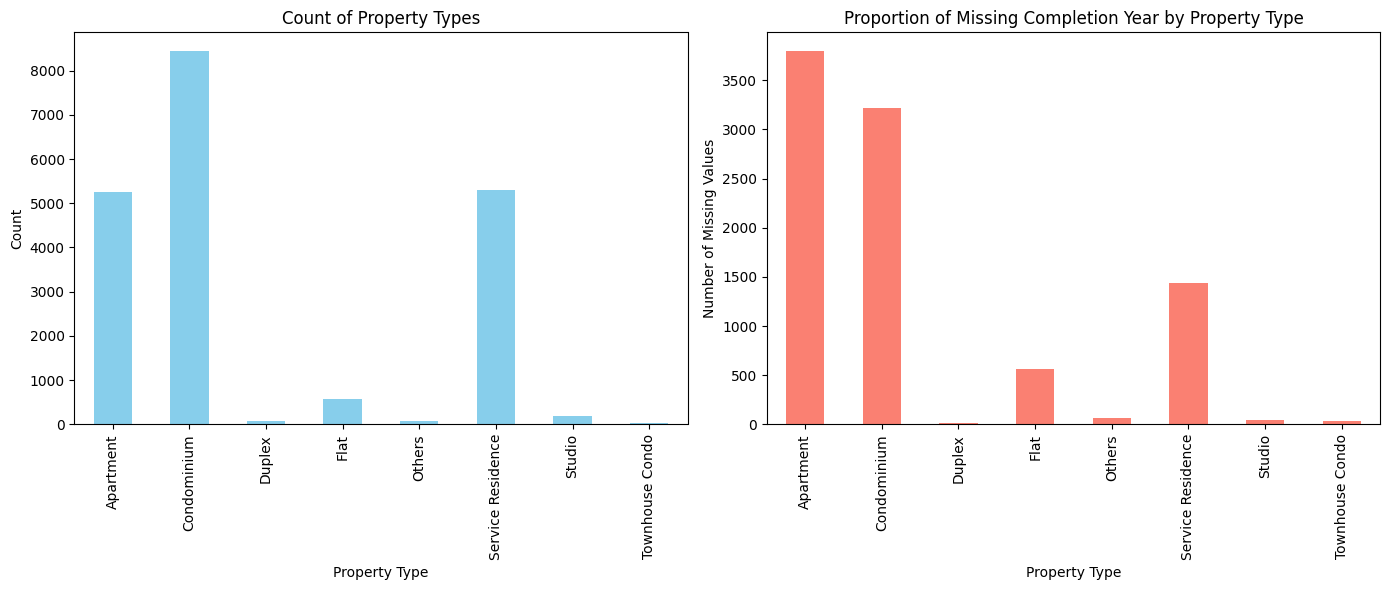

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# property_type value counts
df_feng1['property_type'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Count of Property Types')
axes[0].set_xlabel('Property Type')
axes[0].set_ylabel('Count')

# Number of missing completion_year by property_type
df_feng1.groupby('property_type')['completion_year'].apply(lambda x: x.isna().sum()).sort_index().plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Proportion of Missing Completion Year by Property Type')
axes[1].set_xlabel('Property Type')
axes[1].set_ylabel('Number of Missing Values')

plt.tight_layout()
plt.show()

##### CHECKPOINT 1
Directly imputing such a huge portion of rows will result in bias. So the more likely options are:
- drop rows with missing `completion_year` (and `age`)
- impute with median, then create a flag/indicator column for missing `completion_year` (this accounts for the relationship between missing `completion_year` and `monthly_rent`)

In [58]:
# Sanity check
df_feng1.isna().sum()

completion_year          9172
monthly_rent                0
location                    0
property_type               0
rooms                       0
parking                  5693
bathroom                    0
size                        0
furnished                   0
facilities               2205
additional_facilities    5940
region                      0
age                      9172
dtype: int64

Option 1: Drop rows

In [59]:
df_clean2_1 = df_feng1.copy()

df_clean2_1 = df_clean2_1.dropna(subset=['completion_year', 'age'])
df_clean2_1.isna().sum()

completion_year             0
monthly_rent                0
location                    0
property_type               0
rooms                       0
parking                  2569
bathroom                    0
size                        0
furnished                   0
facilities                809
additional_facilities    2974
region                      0
age                         0
dtype: int64

Option 2: Impute with median and create indicator column

In [60]:
df_clean2_2 = df_feng1.copy()

# Add flag column
df_clean2_2['missing_age'] = df_clean2_2['age'].isna().astype('uint8')

# TODO: Impute

print(df_clean2_2['age'].isna().sum())
df_clean2_2

9172


,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region,age,missing_age
0,2022,4200,Kuala Lumpur - Taman Desa,Condominium,5,2,6,1842,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur,2,0
1,<NA>,2300,Kuala Lumpur - Cheras,Condominium,3,1,2,1170,Partially Furnished,"Playground, Parking, Barbeque area, Security, ...","Air-Cond, Cooking Allowed, Near KTM/LRT",Kuala Lumpur,<NA>,1
2,<NA>,1000,Kuala Lumpur - Taman Desa,Apartment,3,<NA>,2,650,Fully Furnished,"Minimart, Jogging Track, Lift, Swimming Pool",NaN,Kuala Lumpur,<NA>,1
3,2020,1700,Kuala Lumpur - Sentul,Apartment,2,1,2,743,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Cou...","Cooking Allowed, Near KTM/LRT, Washing Machine",Kuala Lumpur,4,0
4,<NA>,1299,Kuala Lumpur - Mont Kiara,Service Residence,1,1,1,494,Not Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...",Air-Cond,Kuala Lumpur,<NA>,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19986,<NA>,1200,Selangor - Kajang,Apartment,3,<NA>,2,1000,Partially Furnished,"Security, Parking, Lift, Minimart, Multipurpos...",Near KTM/LRT,Selangor,<NA>,1
19987,2018,1300,Selangor - Bandar Saujana Putra,Service Residence,4,2,3,1427,Partially Furnished,"Jogging Track, Barbeque area, Playground, Swim...","Air-Cond, Cooking Allowed",Selangor,6,0
19988,<NA>,1350,Selangor - Kajang,Condominium,3,2,2,1270,Partially Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...","Air-Cond, Cooking Allowed, Washing Machine",Selangor,<NA>,1
19989,<NA>,1200,Selangor - Cyberjaya,Service Residence,3,1,2,1100,Fully Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...","Cooking Allowed, Washing Machine",Selangor,<NA>,1


#### `parking`

In [61]:
df_clean2_1['parking'].unique()

<IntegerArray>
[2, 1, <NA>, 3, 10, 5, 9, 4, 7]
Length: 9, dtype: Int8

`parking` value has some outliers, so we impute with median based on property type (although median values are the same as mode so both would work)

In [62]:
# Calculate median parking by property_type
median_parking = df_clean2_1.groupby('property_type')['parking'].median()
print(median_parking)

property_type
Apartment            1.0
Condominium          1.0
Duplex               1.0
Flat                 1.0
Others               1.0
Service Residence    1.0
Studio               1.0
Townhouse Condo      2.0
Name: parking, dtype: Float64


In [63]:
# Sanity check
df_clean2_1[df_clean2_1.parking.isna()]

,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region,age
10,2019,2600,Kuala Lumpur - Bukit Jalil,Service Residence,2,<NA>,2,868,Partially Furnished,"Parking, Playground, Swimming Pool, Security, ...","Cooking Allowed, Near KTM/LRT",Kuala Lumpur,5
30,2006,1750,Kuala Lumpur - Sentul,Apartment,3,<NA>,2,1065,Partially Furnished,NaN,NaN,Kuala Lumpur,18
41,2007,1800,Kuala Lumpur - Setapak,Condominium,3,<NA>,2,1066,Fully Furnished,NaN,NaN,Kuala Lumpur,17
72,2021,3000,Kuala Lumpur - Cheras,Service Residence,3,<NA>,2,864,Fully Furnished,"Swimming Pool, Barbeque area, Security, Multip...","Air-Cond, Cooking Allowed, Near KTM/LRT, Washi...",Kuala Lumpur,3
82,2010,1700,Kuala Lumpur - Wangsa Maju,Condominium,3,<NA>,3,1267,Partially Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...","Air-Cond, Cooking Allowed, Near KTM/LRT, Internet",Kuala Lumpur,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19950,2020,1900,Selangor - Setia Alam,Service Residence,3,<NA>,2,985,Not Furnished,"Playground, Jogging Track, Sauna, Minimart, Li...",Cooking Allowed,Selangor,4
19963,2021,1000,Selangor - Cyberjaya,Studio,1,<NA>,1,450,Fully Furnished,"Security, Parking, Swimming Pool, Playground, ...","Air-Cond, Cooking Allowed, Washing Machine",Selangor,3
19967,2010,850,Selangor - Cheras,Apartment,3,<NA>,2,699,Not Furnished,NaN,Cooking Allowed,Selangor,14
19971,2022,2400,Selangor - Petaling Jaya,Service Residence,2,<NA>,1,670,Partially Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...","Air-Cond, Cooking Allowed, Near KTM/LRT, Washi...",Selangor,2


In [64]:
df_impute_parking = df_clean2_1.copy()

# Add flag column
df_impute_parking['missing_parking'] = df_impute_parking['parking'].isna().astype('uint8')
print(df_impute_parking[df_impute_parking.parking.isna()][['parking', 'missing_parking']])

# Impute
df_impute_parking['parking'] = df_impute_parking['parking'].fillna(df_impute_parking.groupby('property_type')['parking'].transform('median'))

df_impute_parking.isna().sum()

       parking  missing_parking
10        <NA>                1
30        <NA>                1
41        <NA>                1
72        <NA>                1
82        <NA>                1
...        ...              ...
19950     <NA>                1
19963     <NA>                1
19967     <NA>                1
19971     <NA>                1
19974     <NA>                1

[2569 rows x 2 columns]


completion_year             0
monthly_rent                0
location                    0
property_type               0
rooms                       0
parking                     0
bathroom                    0
size                        0
furnished                   0
facilities                809
additional_facilities    2974
region                      0
age                         0
missing_parking             0
dtype: int64

We can now convert it to int8 (non-nullable)

In [65]:
df_impute_parking['parking'] = df_impute_parking['parking'].astype('int8')

In [66]:
# Sanity check
print(df_impute_parking.dtypes)
print()
print(df_impute_parking['parking'].unique())

completion_year           Int16
monthly_rent              int32
location                 object
property_type            object
rooms                      int8
parking                    int8
bathroom                   int8
size                      int16
furnished                object
facilities               object
additional_facilities    object
region                   object
age                       Int16
missing_parking           uint8
dtype: object

[ 2  1  3 10  5  9  4  7]


In [67]:
def compare_parking_median(parking_vals):
    print('val:    yes | no')
    print('---------------------------------------')
    for val in parking_vals:
        median = df_impute_parking[df_impute_parking.parking == val].monthly_rent.median()
        print(f'{val}: {median}')

compare_parking_median(sorted(df_impute_parking.parking.unique().tolist()))

val:    yes | no
---------------------------------------
1: 1500.0
2: 1800.0
3: 2800.0
4: 2750.0
5: 2200.0
7: 2500.0
9: 1100.0
10: 890.0


In [68]:
df_impute_parking[df_impute_parking.parking == 10]

,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region,age,missing_parking
1714,2005,110,Kuala Lumpur - Cheras,Condominium,1,10,1,-7937,Not Furnished,"Security, Tennis Court, Parking, Swimming Pool...",NaN,Kuala Lumpur,19,0
11701,2015,890,Selangor - Klang,Apartment,3,10,2,657,Fully Furnished,"Parking, Playground, Minimart, Multipurpose ha...","Cooking Allowed, Near KTM/LRT",Selangor,9,0
14241,2017,1200,Selangor - Kota Damansara,Apartment,3,10,2,800,Partially Furnished,"Jogging Track, Parking, Playground, Minimart, ...","Cooking Allowed, Near KTM/LRT",Selangor,7,0


#### `facilities`

In [69]:
# Sanity check
df_impute_parking.isna().sum()

completion_year             0
monthly_rent                0
location                    0
property_type               0
rooms                       0
parking                     0
bathroom                    0
size                        0
furnished                   0
facilities                809
additional_facilities    2974
region                      0
age                         0
missing_parking             0
dtype: int64

Currently in the form of a list of strings. We need to extract unique facilities from the dataset.

In [70]:
# Get all facility lists
facilities = df_impute_parking['facilities']

# Get unique facilities
facilities_series = pd.Series(facilities)
split_facilities = facilities_series.str.split(',').explode().str.strip()
unique_facilities = split_facilities.unique()

# Remove NaN
unique_facilities = unique_facilities[~pd.isna(unique_facilities)]

print(len(unique_facilities))
print(unique_facilities)

14
['Minimart' 'Gymnasium' 'Security' 'Playground' 'Swimming Pool' 'Parking'
 'Lift' 'Barbeque area' 'Multipurpose hall' 'Jogging Track' 'Squash Court'
 'Sauna' 'Club house' 'Tennis Court']


NOTE: Preliminary OHE - create new binary categorical feature for each unique facility

In [71]:
def to_snake_case(name):
    name = name.lower()
    name = re.sub(r'[\s-]+', '_', name)
    return name

df_ohe_facilities = df_impute_parking.copy()

# Create new columns
for facility in unique_facilities:
    df_ohe_facilities[f'f_{to_snake_case(facility)}'] = df_impute_parking['facilities'].apply(lambda x: 1 if facility in str(x) else 0)

# Verify
facility_cols = ['facilities']
new_facility_cols = []
for i in range(len(unique_facilities)):
    facility_cols.append(f'f_{to_snake_case(unique_facilities[i])}')
    new_facility_cols.append(f'f_{to_snake_case(unique_facilities[i])}')

# Convert to uint8
df_ohe_facilities[new_facility_cols] = df_ohe_facilities[new_facility_cols].astype('uint8')

df_ohe_facilities[facility_cols]

,facilities,f_minimart,f_gymnasium,f_security,f_playground,f_swimming_pool,f_parking,f_lift,f_barbeque_area,f_multipurpose_hall,f_jogging_track,f_squash_court,f_sauna,f_club_house,f_tennis_court
0,"Minimart, Gymnasium, Security, Playground, Swi...",1,1,1,1,1,1,1,1,1,1,0,0,0,0
3,"Parking, Playground, Swimming Pool, Squash Cou...",1,1,1,1,1,1,1,0,0,0,1,0,0,0
7,"Parking, Gymnasium, Playground, Security, Lift...",0,1,1,1,1,1,1,0,1,0,0,0,0,0
8,"Playground, Security, Parking, Lift, Swimming ...",0,0,1,1,1,1,1,0,0,0,0,0,0,0
10,"Parking, Playground, Swimming Pool, Security, ...",0,1,1,1,1,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19981,"Parking, Security, Lift, Swimming Pool, Playgr...",1,1,1,1,1,1,1,1,1,1,1,1,1,1
19983,"Parking, Security, Lift, Swimming Pool, Playgr...",1,1,1,1,1,1,1,1,1,1,0,1,0,0
19985,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19987,"Jogging Track, Barbeque area, Playground, Swim...",0,0,0,1,1,0,0,1,0,1,0,1,0,1


Before we remove the old `facilities` column, we need to impute rows with NaN facilities.\
First, let's check if `facilities` affect `monthly_rent`.

In [72]:
print(f'Overall monthly_rent median: {df_ohe_facilities.monthly_rent.median()}')
print(f'Filled facilities monthly_rent median: {df_ohe_facilities[df_ohe_facilities.facilities.notna()].monthly_rent.median()}')
print(f'Missing facilities monthly_rent median: {df_ohe_facilities[df_ohe_facilities.facilities.isna()].monthly_rent.median()}')

Overall monthly_rent median: 1600.0
Filled facilities monthly_rent median: 1600.0
Missing facilities monthly_rent median: 1600.0


No clear results. So, we need to check for each facility.\
It seems that facilities do in fact affect rental prices.

NOTE: We will consider >=100 to be impactful in final feature selection later

In [73]:
def compare_facility_median(new_facility_cols):
    print('facility:    yes | no')
    print('---------------------------------------')
    for facility in new_facility_cols:
        yes_facility_median = df_ohe_facilities[(df_ohe_facilities.facilities.notna()) & (df_ohe_facilities[facility] == 1)].monthly_rent.median()
        no_facility_median = df_ohe_facilities[(df_ohe_facilities.facilities.notna()) & (df_ohe_facilities[facility] == 0)].monthly_rent.median()
        print(f'{facility} medians: {yes_facility_median} | {no_facility_median}')

compare_facility_median(new_facility_cols)

facility:    yes | no
---------------------------------------
f_minimart medians: 1550.0 | 1600.0
f_gymnasium medians: 1600.0 | 1300.0
f_security medians: 1600.0 | 1374.5
f_playground medians: 1600.0 | 1500.0
f_swimming_pool medians: 1600.0 | 1300.0
f_parking medians: 1600.0 | 1500.0
f_lift medians: 1600.0 | 1600.0
f_barbeque_area medians: 1650.0 | 1500.0
f_multipurpose_hall medians: 1600.0 | 1500.0
f_jogging_track medians: 1600.0 | 1550.0
f_squash_court medians: 1700.0 | 1500.0
f_sauna medians: 1700.0 | 1500.0
f_club_house medians: 1700.0 | 1550.0
f_tennis_court medians: 1700.0 | 1500.0


<Figure size 1000x600 with 0 Axes>

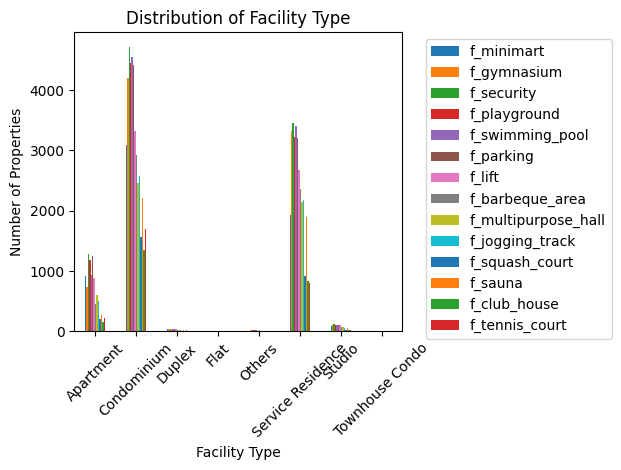

,f_minimart,f_gymnasium,f_security,f_playground,f_swimming_pool,f_parking,f_lift,f_barbeque_area,f_multipurpose_hall,f_jogging_track,f_squash_court,f_sauna,f_club_house,f_tennis_court
property_type,,,,,,,,,,,,,,
Apartment,913,739,1288,1189,929,1254,888,451,600,498,206,269,158,221
Condominium,3091,4206,4722,4457,4545,4422,3318,2931,2456,2583,1562,2207,1355,1693
Duplex,34,36,43,31,35,38,37,22,20,19,14,20,11,17
Flat,11,1,4,14,1,9,5,1,0,2,1,0,1,0
Others,8,18,22,18,17,23,8,17,14,13,4,7,5,4
Service Residence,1936,3315,3448,3222,3402,3209,2668,2358,2146,2175,916,1895,830,810
Studio,86,107,118,103,113,104,111,78,69,64,17,59,21,16
Townhouse Condo,1,2,6,6,3,6,2,3,3,3,0,0,1,0


In [74]:
property_counts = df_ohe_facilities.groupby('property_type')[new_facility_cols].sum()
plot_barv(property_counts, 'Distribution of Facility Type', 'Facility Type', 'Number of Properties')
property_counts

In [75]:
df_ohe_facilities[df_ohe_facilities['facilities'].isna()].groupby('property_type').size()

property_type
Apartment             98
Condominium          394
Duplex                15
Flat                   4
Service Residence    279
Studio                19
dtype: int64

Impute missing values for each facility.\
for every property:
- for every facility type:
    - if property's `montly_rent` is >= `median * 0.9` of properties of the same `property_type`:
        - set to 1

In [76]:
# Get median monthly_rent of every facility by property_type
facility_medians = {}
for facility in new_facility_cols:
    facility_medians[facility] = df_ohe_facilities[df_ohe_facilities[facility] == 1].groupby('property_type').monthly_rent.median()
facility_medians

{'f_minimart': property_type
 Apartment            1300.0
 Condominium          1600.0
 Duplex               1600.0
 Flat                  700.0
 Others                965.0
 Service Residence    1600.0
 Studio               1250.0
 Townhouse Condo      2200.0
 Name: monthly_rent, dtype: float64,
 'f_gymnasium': property_type
 Apartment            1400.0
 Condominium          1700.0
 Duplex               1600.0
 Flat                  600.0
 Others               1040.0
 Service Residence    1650.0
 Studio               1200.0
 Townhouse Condo      2600.0
 Name: monthly_rent, dtype: float64,
 'f_security': property_type
 Apartment            1300.0
 Condominium          1600.0
 Duplex               1600.0
 Flat                  680.0
 Others               1125.0
 Service Residence    1650.0
 Studio               1200.0
 Townhouse Condo      2200.0
 Name: monthly_rent, dtype: float64,
 'f_playground': property_type
 Apartment            1300.0
 Condominium          1600.0
 Duplex         

In [77]:
df_impute_facilities = df_ohe_facilities.copy()
# Add flag column
df_impute_facilities['missing_facilities'] = df_ohe_facilities['facilities'].isna().astype('uint8')
df_impute_facilities

# Imput missing facility data based on median rent threshold
for index, row in df_impute_facilities.iterrows():
    for facility in new_facility_cols:
        # If facility is missing
        if row.missing_facilities == 1:
            property_type = row.property_type
            # If monthly_rent is >= 90% of the median
            if row.monthly_rent >= (facility_medians[facility].get(property_type, 0) * 0.9):
                df_impute_facilities.at[index, facility] = 1     # Impute facility as 1

In [78]:
# Sanity check
df_ohe_facilities[df_ohe_facilities.facilities.isna()][['monthly_rent', 'property_type', 'facilities'] + new_facility_cols].tail(5)

,monthly_rent,property_type,facilities,f_minimart,f_gymnasium,f_security,f_playground,f_swimming_pool,f_parking,f_lift,f_barbeque_area,f_multipurpose_hall,f_jogging_track,f_squash_court,f_sauna,f_club_house,f_tennis_court
19862,900,Apartment,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19905,1200,Condominium,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19911,850,Apartment,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19967,850,Apartment,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19985,1500,Service Residence,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [79]:
# Sanity check
df_impute_facilities[df_impute_facilities.facilities.isna()][['monthly_rent', 'property_type', 'facilities'] + new_facility_cols].tail(5)

,monthly_rent,property_type,facilities,f_minimart,f_gymnasium,f_security,f_playground,f_swimming_pool,f_parking,f_lift,f_barbeque_area,f_multipurpose_hall,f_jogging_track,f_squash_court,f_sauna,f_club_house,f_tennis_court
19862,900,Apartment,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19905,1200,Condominium,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19911,850,Apartment,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19967,850,Apartment,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19985,1500,Service Residence,NaN,1,1,1,1,1,1,1,1,1,1,0,0,1,0


In [80]:
# Now we can drop facilities
df_impute_facilities = df_impute_facilities.drop(columns=['facilities'])
df_impute_facilities.dtypes

completion_year           Int16
monthly_rent              int32
location                 object
property_type            object
rooms                      int8
parking                    int8
bathroom                   int8
size                      int16
furnished                object
additional_facilities    object
region                   object
age                       Int16
missing_parking           uint8
f_minimart                uint8
f_gymnasium               uint8
f_security                uint8
f_playground              uint8
f_swimming_pool           uint8
f_parking                 uint8
f_lift                    uint8
f_barbeque_area           uint8
f_multipurpose_hall       uint8
f_jogging_track           uint8
f_squash_court            uint8
f_sauna                   uint8
f_club_house              uint8
f_tennis_court            uint8
missing_facilities        uint8
dtype: object

#### `additional_facilities`
Same process as `facilities`

In [81]:
# Sanity check
df_impute_facilities.isna().sum()

completion_year             0
monthly_rent                0
location                    0
property_type               0
rooms                       0
parking                     0
bathroom                    0
size                        0
furnished                   0
additional_facilities    2974
region                      0
age                         0
missing_parking             0
f_minimart                  0
f_gymnasium                 0
f_security                  0
f_playground                0
f_swimming_pool             0
f_parking                   0
f_lift                      0
f_barbeque_area             0
f_multipurpose_hall         0
f_jogging_track             0
f_squash_court              0
f_sauna                     0
f_club_house                0
f_tennis_court              0
missing_facilities          0
dtype: int64

In [82]:
#Get all additional facility lists
additional_facilities = df_impute_facilities['additional_facilities']

# Get unique additional_facilities
additional_facilities_series = pd.Series(additional_facilities)
split_additional_facilities = additional_facilities_series.str.split(',').explode().str.strip()
unique_additional_facilities = split_additional_facilities.unique()

# Remove NaN
unique_additional_facilities = unique_additional_facilities[~pd.isna(unique_additional_facilities)  & (unique_additional_facilities != '')]

print(len(unique_additional_facilities))
print(unique_additional_facilities)

5
['Air-Cond' 'Cooking Allowed' 'Washing Machine' 'Near KTM/LRT' 'Internet']


NOTE: Preliminary OHE - create new binary categorical features for each unique `additional_facility`.

NOTE: Let's rename `additional_facilities` to `amenities` as it is called on mudah for clarity and easier typing.

In [83]:
def to_snake_case(name):
    name = name.lower()
    name = re.sub(r'[/\s-]+', '_', name)
    return name

# Copy new DF
df_ohe_amenities = df_impute_facilities.copy()

# Rename column
df_ohe_amenities = df_ohe_amenities.rename(columns={'additional_facilities': 'amenities'})

# Create new columns
for amenity in unique_additional_facilities:
    df_ohe_amenities[f'a_{to_snake_case(amenity)}'] = df_impute_facilities['additional_facilities'].apply(lambda x: 1 if amenity in str(x) else 0)

# Verify
amenity_cols = ['amenities']
new_amenity_cols = []
for i in range(len(unique_additional_facilities)):
    amenity_cols.append(f'a_{to_snake_case(unique_additional_facilities[i])}')
    new_amenity_cols.append(f'a_{to_snake_case(unique_additional_facilities[i])}')

# Convert to uint8
df_ohe_amenities[new_amenity_cols] = df_ohe_amenities[new_amenity_cols].astype('uint8')

df_ohe_amenities[amenity_cols]

,amenities,a_air_cond,a_cooking_allowed,a_washing_machine,a_near_ktm_lrt,a_internet
0,"Air-Cond, Cooking Allowed, Washing Machine",1,1,1,0,0
3,"Cooking Allowed, Near KTM/LRT, Washing Machine",0,1,1,1,0
7,"Air-Cond, Cooking Allowed, Near KTM/LRT, Washi...",1,1,1,1,0
8,"Air-Cond, Cooking Allowed, Washing Machine, Ne...",1,1,1,1,0
10,"Cooking Allowed, Near KTM/LRT",0,1,0,1,0
...,...,...,...,...,...,...
19981,"Air-Cond, Cooking Allowed, Washing Machine",1,1,1,0,0
19983,"Cooking Allowed, Near KTM/LRT",0,1,0,1,0
19985,Air-Cond,1,0,0,0,0
19987,"Air-Cond, Cooking Allowed",1,1,0,0,0


Before we remove the old `amenities` column, we need to impute rows with NaN `amenities`.\
First, let's check if `amenities` affect `monthly_rent`.

In [84]:
print(f'Overall monthly_rent median: {df_ohe_amenities.monthly_rent.median()}')
print(f'Filled amenities monthly_rent median: {df_ohe_amenities[df_ohe_amenities.amenities.notna()].monthly_rent.median()}')
print(f'Missing amenities monthly_rent median: {df_ohe_amenities[df_ohe_amenities.amenities.isna()].monthly_rent.median()}')

Overall monthly_rent median: 1600.0
Filled amenities monthly_rent median: 1600.0
Missing amenities monthly_rent median: 1600.0


No clear results. So, we need to check for each amenity.\
Some amenities do affect rental prices.

NOTE: We will consider >=100 to be impactful in final feature selection later.

In [85]:
print('amenity:    yes | no')
print('---------------------------------------')
for amenity in new_amenity_cols:
    yes_amenity_median = df_ohe_amenities[(df_ohe_amenities.amenities.notna()) & (df_ohe_amenities[amenity] == 1)].monthly_rent.median()
    no_amenity_median = df_ohe_amenities[(df_ohe_amenities.amenities.notna()) & (df_ohe_amenities[amenity] == 0)].monthly_rent.median()
    print(f'{amenity} medians: {yes_amenity_median} | {no_amenity_median}')

amenity:    yes | no
---------------------------------------
a_air_cond medians: 1600.0 | 1200.0
a_cooking_allowed medians: 1600.0 | 1500.0
a_washing_machine medians: 1700.0 | 1400.0
a_near_ktm_lrt medians: 1600.0 | 1500.0
a_internet medians: 1600.0 | 1600.0


Impute missing values for each facility.\
for every property:
- for every amenity type:
    - if property's `montly_rent` is >= `median * 0.9` of properties of the same `property_type`:
        - set to 1

In [86]:
# Get median monthly_rent of every amenity by property_type
amenity_medians = {}
for amenity in new_amenity_cols:
    amenity_medians[amenity] = df_ohe_amenities[df_ohe_amenities[amenity] == 1].groupby('property_type').monthly_rent.median()
amenity_medians

{'a_air_cond': property_type
 Apartment            1400.0
 Condominium          1700.0
 Duplex               1500.0
 Flat                  725.0
 Others               1100.0
 Service Residence    1650.0
 Studio               1200.0
 Townhouse Condo      2200.0
 Name: monthly_rent, dtype: float64,
 'a_cooking_allowed': property_type
 Apartment            1300.0
 Condominium          1600.0
 Duplex               1600.0
 Flat                  748.0
 Others               1025.0
 Service Residence    1600.0
 Studio               1200.0
 Townhouse Condo      2200.0
 Name: monthly_rent, dtype: float64,
 'a_washing_machine': property_type
 Apartment            1500.0
 Condominium          1800.0
 Duplex               1600.0
 Flat                 1000.0
 Others                950.0
 Service Residence    1800.0
 Studio               1290.0
 Townhouse Condo      2350.0
 Name: monthly_rent, dtype: float64,
 'a_near_ktm_lrt': property_type
 Apartment            1300.0
 Condominium          1700.0
 

In [87]:
# Copy DF
df_impute_amenities = df_ohe_amenities.copy()

# Add flag column
df_impute_amenities['missing_amenities'] = df_impute_amenities['amenities'].isna().astype('uint8')
df_impute_amenities

# Imput missing amenity data based on median rent threshold
for index, row in df_impute_amenities.iterrows():
    for amenity in new_amenity_cols:
        # If facility is missing
        if row.missing_amenities == 1:
            property_type = row.property_type
            # If monthly_rent is >= 90% of the median
            if row.monthly_rent >= (amenity_medians[amenity].get(property_type, 0) * 0.9):
                df_impute_amenities.at[index, amenity] = 1     # Impute amenity as 1

In [88]:
# Sanity check
df_ohe_amenities[df_ohe_amenities.amenities.isna()][['monthly_rent', 'property_type', 'amenities'] + new_amenity_cols].tail(5)

,monthly_rent,property_type,amenities,a_air_cond,a_cooking_allowed,a_washing_machine,a_near_ktm_lrt,a_internet
19953,900,Apartment,NaN,0,0,0,0,0
19968,1000,Condominium,NaN,0,0,0,0,0
19970,2000,Condominium,NaN,0,0,0,0,0
19972,3500,Condominium,NaN,0,0,0,0,0
19974,2600,Service Residence,NaN,0,0,0,0,0


In [89]:
# Sanity check
df_impute_amenities[df_impute_amenities.amenities.isna()][['monthly_rent', 'property_type', 'amenities'] + new_amenity_cols].tail(5)

,monthly_rent,property_type,amenities,a_air_cond,a_cooking_allowed,a_washing_machine,a_near_ktm_lrt,a_internet
19953,900,Apartment,NaN,0,0,0,0,0
19968,1000,Condominium,NaN,0,0,0,0,0
19970,2000,Condominium,NaN,1,1,1,1,1
19972,3500,Condominium,NaN,1,1,1,1,1
19974,2600,Service Residence,NaN,1,1,1,1,1


In [90]:
# Now we can drop amenities
df_impute_amenities = df_impute_amenities.drop(columns=['amenities'])
print(df_impute_amenities.shape)
print(df_impute_amenities.dtypes)

(10798, 33)
completion_year         Int16
monthly_rent            int32
location               object
property_type          object
rooms                    int8
parking                  int8
bathroom                 int8
size                    int16
furnished              object
region                 object
age                     Int16
missing_parking         uint8
f_minimart              uint8
f_gymnasium             uint8
f_security              uint8
f_playground            uint8
f_swimming_pool         uint8
f_parking               uint8
f_lift                  uint8
f_barbeque_area         uint8
f_multipurpose_hall     uint8
f_jogging_track         uint8
f_squash_court          uint8
f_sauna                 uint8
f_club_house            uint8
f_tennis_court          uint8
missing_facilities      uint8
a_air_cond              uint8
a_cooking_allowed       uint8
a_washing_machine       uint8
a_near_ktm_lrt          uint8
a_internet              uint8
missing_amenities       uint

In [91]:
# Sanity check
df_impute_amenities.isna().sum()

completion_year        0
monthly_rent           0
location               0
property_type          0
rooms                  0
parking                0
bathroom               0
size                   0
furnished              0
region                 0
age                    0
missing_parking        0
f_minimart             0
f_gymnasium            0
f_security             0
f_playground           0
f_swimming_pool        0
f_parking              0
f_lift                 0
f_barbeque_area        0
f_multipurpose_hall    0
f_jogging_track        0
f_squash_court         0
f_sauna                0
f_club_house           0
f_tennis_court         0
missing_facilities     0
a_air_cond             0
a_cooking_allowed      0
a_washing_machine      0
a_near_ktm_lrt         0
a_internet             0
missing_amenities      0
dtype: int64

### Remove Outliers

- `monthly_year`
- `rooms`
- `parking`
- `bathroom`
- `size`
- `age`

In [92]:
df_remove_outliers = df_impute_amenities.copy()
df_remove_outliers.dtypes

completion_year         Int16
monthly_rent            int32
location               object
property_type          object
rooms                    int8
parking                  int8
bathroom                 int8
size                    int16
furnished              object
region                 object
age                     Int16
missing_parking         uint8
f_minimart              uint8
f_gymnasium             uint8
f_security              uint8
f_playground            uint8
f_swimming_pool         uint8
f_parking               uint8
f_lift                  uint8
f_barbeque_area         uint8
f_multipurpose_hall     uint8
f_jogging_track         uint8
f_squash_court          uint8
f_sauna                 uint8
f_club_house            uint8
f_tennis_court          uint8
missing_facilities      uint8
a_air_cond              uint8
a_cooking_allowed       uint8
a_washing_machine       uint8
a_near_ktm_lrt          uint8
a_internet              uint8
missing_amenities       uint8
dtype: obj

#### Finding Outliers

Boxplots

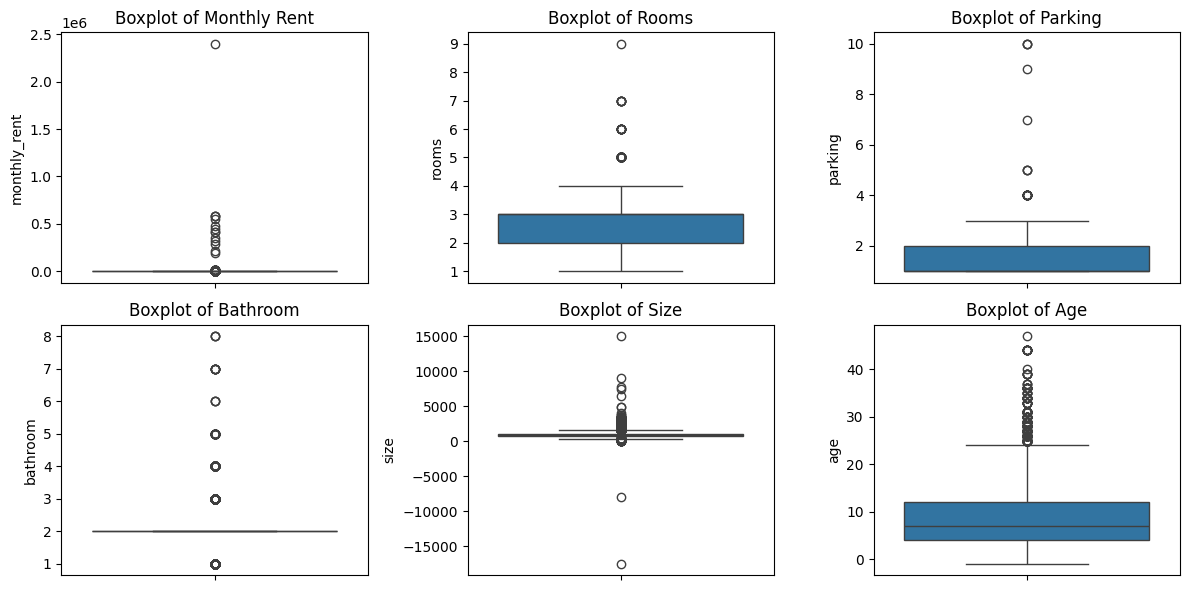

In [93]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
axes = axes.flatten()

# monthly_rent
sns.boxplot(ax=axes[0], data=df_remove_outliers, y='monthly_rent')
axes[0].set_title('Boxplot of Monthly Rent')

# rooms
sns.boxplot(ax=axes[1], data=df_remove_outliers, y='rooms')
axes[1].set_title('Boxplot of Rooms')

# parking
sns.boxplot(ax=axes[2], data=df_remove_outliers, y='parking')
axes[2].set_title('Boxplot of Parking')

# bathroom
sns.boxplot(ax=axes[3], data=df_remove_outliers, y='bathroom')
axes[3].set_title('Boxplot of Bathroom')

# size
sns.boxplot(ax=axes[4], data=df_remove_outliers, y='size')
axes[4].set_title('Boxplot of Size')

# age
sns.boxplot(ax=axes[5], data=df_remove_outliers, y='age')
axes[5].set_title('Boxplot of Age')

plt.tight_layout()
plt.show()

Scatterplots

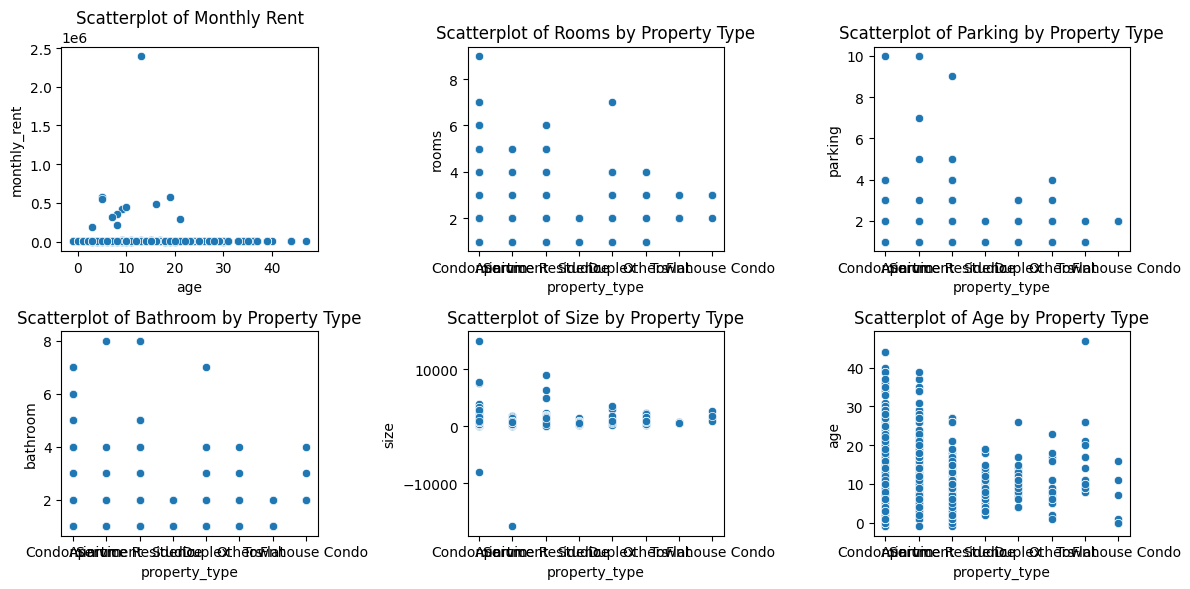

In [94]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
axes = axes.flatten()

# monthly_rent
sns.scatterplot(ax=axes[0], data=df_remove_outliers, x='age', y='monthly_rent')
axes[0].set_title('Scatterplot of Monthly Rent')

# rooms
sns.scatterplot(ax=axes[1], data=df_remove_outliers, x='property_type', y='rooms')
axes[1].set_title('Scatterplot of Rooms by Property Type')

# parking
sns.scatterplot(ax=axes[2], data=df_remove_outliers, x='property_type', y='parking')
axes[2].set_title('Scatterplot of Parking by Property Type')

# bathroom
sns.scatterplot(ax=axes[3], data=df_remove_outliers, x='property_type', y='bathroom')
axes[3].set_title('Scatterplot of Bathroom by Property Type')

# size
sns.scatterplot(ax=axes[4], data=df_remove_outliers, x='property_type', y='size')
axes[4].set_title('Scatterplot of Size by Property Type')

# age
sns.scatterplot(ax=axes[5], data=df_remove_outliers, x='property_type', y='age')
axes[5].set_title('Scatterplot of Age by Property Type')

plt.tight_layout()
plt.show()

IQR

In [95]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

#### `monthly_rent`
Although IQR says there are 651 outliers, there is an obvious jump from 18,500 to 190,000. Using domain knowledge, 18,500 still makes sense for monthly_rent.\
Since 190,000 and above are obviously supposed to be sale prices but incorrectly listed as monthly rent, we can remove them.

In [96]:
df_rent_outliers = detect_outliers_iqr(df_remove_outliers, 'monthly_rent').sort_values(by='monthly_rent')
len(df_rent_outliers)

651

In [97]:
df_rent_outliers.monthly_rent.tail(20)

4178       16000
5489       16000
1020       16000
5657       16800
9408       17000
8919       18500
12128     190000
17140     215000
3421      288000
18681     320000
12103     349898
7369      418000
7336      419000
17988     450000
17065     480000
8642      550000
5705      580000
8640      580000
2374      580000
4672     2400000
Name: monthly_rent, dtype: int32

In [98]:
df_rent_outliers.monthly_rent.head(20)

18712      70
8062       80
3104      100
3858      100
18159     100
1714      110
3889      120
5966      120
6308      120
19831     120
13065     150
2242      150
11827     150
17775     150
6498      180
13973     200
8523      200
6055      200
17232     220
4056     3088
Name: monthly_rent, dtype: int32

Remove rows with monthly_rent of more than 18500

In [99]:
df_remove_outliers = df_remove_outliers[df_remove_outliers.monthly_rent <= 18500]
df_remove_outliers.sort_values(by='monthly_rent').monthly_rent.tail(20)

8885      9600
18213     9800
3673     10000
3093     10000
1237     10000
5273     10300
792      11500
7460     11500
10760    12500
1233     13000
5069     15000
7979     15000
5537     15000
5489     16000
1020     16000
4178     16000
1685     16000
5657     16800
9408     17000
8919     18500
Name: monthly_rent, dtype: int32

IQR says <=220 are outliers, which makes sense, so let's remove those as well.

In [100]:
df_remove_outliers = df_remove_outliers[df_remove_outliers.monthly_rent > 220]
df_remove_outliers.sort_values(by='monthly_rent').monthly_rent.head(20)

3499     250
10471    250
15820    290
19155    370
14799    380
10985    380
19909    400
1258     400
11268    450
969      450
19628    450
3682     450
14467    450
15819    450
4990     450
15331    450
10436    450
17250    460
11112    499
19851    499
Name: monthly_rent, dtype: int32

#### `rooms`

These room outliers are acceptable.

In [101]:
df_rooms_outliers = detect_outliers_iqr(df_remove_outliers, 'rooms').sort_values(by='rooms')
len(df_rooms_outliers)

68

In [102]:
df_rooms_outliers.rooms.tail(20)

4069     5
3672     5
3474     5
17321    6
513      6
5890     6
7017     6
8761     6
1365     6
9497     6
9502     6
3583     6
10855    6
9408     7
3975     7
2772     7
281      7
8887     7
3555     7
10831    9
Name: rooms, dtype: int8

In [103]:
df_rooms_outliers.rooms.head(20)

0        5
17776    5
8032     5
8985     5
9969     5
10012    5
10148    5
10631    5
10715    5
11278    5
11337    5
11689    5
11981    5
12022    5
13176    5
13275    5
13301    5
14272    5
14344    5
14354    5
Name: rooms, dtype: int8

#### `parking`

These parking outliers are acceptable.

In [104]:
df_parking_outliers = detect_outliers_iqr(df_remove_outliers, 'parking').sort_values(by='parking')
len(df_parking_outliers)

23

In [125]:
df_parking_outliers.parking.tail(20)

13301     4
19033     4
12329     4
11915     4
14978     4
15477     4
10290     4
9408      4
8897      4
7017      4
6078      4
17321     4
10855     4
2351      5
12843     5
19259     5
16112     7
5411      9
11701    10
14241    10
Name: parking, dtype: int8

In [106]:
df_parking_outliers.parking.head(20)

16051    4
15849    4
13760    4
13301    4
19033    4
12329    4
11915    4
14978    4
15477    4
10290    4
9408     4
8897     4
7017     4
6078     4
17321    4
10855    4
2351     5
12843    5
19259    5
16112    7
Name: parking, dtype: int8

#### `bathroom`

These bathroom outliers are acceptable.

In [107]:
df_bathroom_outliers = detect_outliers_iqr(df_remove_outliers, 'bathroom').sort_values(by='bathroom')
len(df_bathroom_outliers)

2886

In [108]:
df_bathroom_outliers.bathroom.tail(20)

9502     5
2562     5
5112     5
2092     5
5657     5
8133     5
7421     5
0        6
3583     6
8919     6
2322     7
281      7
3555     7
9408     7
2772     7
3975     7
8887     7
10855    8
17321    8
15335    8
Name: bathroom, dtype: int8

In [109]:
df_bathroom_outliers.bathroom.head(20)

10854    1
13150    1
13152    1
13153    1
13154    1
13207    1
13232    1
13233    1
13134    1
13238    1
13251    1
13257    1
13259    1
13260    1
13276    1
13286    1
13294    1
13242    1
13132    1
13123    1
Name: bathroom, dtype: int8

#### `size`

In [110]:
df_size_outliers = detect_outliers_iqr(df_remove_outliers, 'size').sort_values(by='size')
len(df_size_outliers)

485

In [111]:
df_size_outliers['size'].tail(20)

3370      3283
18214     3320
18213     3340
7017      3400
8887      3488
281       3488
3975      3488
2322      3488
2772      3488
3555      3488
13301     3700
4043      3713
16404     4000
17321     4915
10855     4915
18448     6400
8919      7506
9408      7800
2025      9001
4518     15000
Name: size, dtype: int16

Of the last 5, only "The Oval" seems legit. Everything before these are legit.

In [112]:
print(df[df['size'] == '6400 sq.ft.'][['prop_name', 'monthly_rent']])
print(df[df['size'] == '7506 sq.ft.'][['prop_name', 'monthly_rent']])
print(df[df['size'] == '7800 sq.ft.'][['prop_name', 'monthly_rent']])
print(df[df['size'] == '9001 sq.ft.'][['prop_name', 'monthly_rent']])
print(df[df['size'] == '15000 sq.ft.'][['prop_name', 'monthly_rent']])

                          prop_name        monthly_rent
18448  Eclipse Residence @ Pan'gaea  RM 1 780 per month
        prop_name         monthly_rent
8919  Embassyview  RM 18 500 per month
     prop_name         monthly_rent
9408  The Oval  RM 17 000 per month
              prop_name        monthly_rent
2025  Mizumi Residences  RM 1 800 per month
          prop_name        monthly_rent
4518  Sri Wangsaria  RM 3 300 per month


In [113]:
df_size_outliers['size'].head(20)

2622    -17526
16775        1
19964        1
5069         3
13558       13
513         20
16057       59
9143        80
19260       88
11812       90
5892       100
6189       100
6852       100
8495       100
17131      100
13845      100
14467      120
15232      130
17176      130
10148      150
Name: size, dtype: int16

Anything less than 80 sq.ft. looks like errors

In [114]:
print(df[df['size'] == '80 sq.ft.'][['prop_name', 'monthly_rent']])
print(df[df['size'] == '90 sq.ft.'][['prop_name', 'monthly_rent']])
print(df[df['size'] == '100 sq.ft.'][['prop_name', 'monthly_rent']])

                                   prop_name      monthly_rent
2242                      Platinum Hill PV 5  RM 150 per month
9143   Ascenda Residences @ SkyArena Setapak  RM 550 per month
15345                                    NaN  RM 580 per month
      prop_name      monthly_rent
11812  The Zizz  RM 500 per month
                                           prop_name        monthly_rent
761                                              NaN    RM 750 per month
1716                                   Idaman Sutera     RM 90 per month
2103                                   Prima Setapak    RM 200 per month
2798                           Residensi Pandanmas 1    RM 150 per month
3104                        Melur Apartment (Sentul)    RM 100 per month
3668                                             NaN    RM 150 per month
3858                              Platinum Hill PV 2    RM 100 per month
5892                                  Unio Residence  RM 1 000 per month
6166                   

Keep rows with `size` between 80 and 4915, but keep 7800 (The Oval).

In [127]:
df_remove_outliers = df_remove_outliers[((df_remove_outliers['size'] >= 80) & (df_remove_outliers['size'] <= 4915)) | (df_remove_outliers['size'] == 7800)]
df_remove_outliers.sort_values(by='size')['size'].tail(20)

1020     3218
1685     3218
3213     3223
7011     3223
3370     3283
18214    3320
18213    3340
7017     3400
281      3488
2322     3488
2772     3488
8887     3488
3975     3488
3555     3488
13301    3700
4043     3713
16404    4000
10855    4915
17321    4915
9408     7800
Name: size, dtype: int16

In [128]:
df_remove_outliers.sort_values(by='size')['size'].head(20)

9143      80
19260     88
11812     90
8495     100
6189     100
17131    100
5892     100
6852     100
13845    100
14467    120
17176    130
15232    130
17179    150
10148    150
17159    150
12776    150
8193     175
11337    180
19782    180
10520    200
Name: size, dtype: int16

#### `age`
No obvious error-induced outliers.

In [129]:
df_age_outliers = detect_outliers_iqr(df_remove_outliers, 'age').sort_values(by='age')
len(df_age_outliers)

410

In [132]:
df_age_outliers.age.tail(20)

17938    37
5677     39
1640     39
7944     39
9832     39
10980    39
80       39
2135     44
2339     44
3128     44
1174     44
4364     44
5354     44
5512     44
5529     44
6287     44
1393     44
3351     44
7719     44
11914    47
Name: age, dtype: Int16

In [140]:
df[df.completion_year <= 1987]

,ads_id,prop_name,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region
80,100321040,Faber Ria,1985.0,RM 1 300 per month,Kuala Lumpur - Taman Desa,Condominium,2,1.0,2.0,1050 sq.ft.,Partially Furnished,"Playground, Swimming Pool, Tennis Court, Squas...",Cooking Allowed,Kuala Lumpur
1174,100276385,Brem Park 2,1980.0,RM 1 300 per month,Kuala Lumpur - Pantai,Condominium,2,1.0,3.0,1100 sq.ft.,Fully Furnished,"Sauna, Squash Court, Parking, Playground, Swim...",NaN,Kuala Lumpur
1393,100268598,Brem Park 1,1980.0,RM 1 100 per month,Kuala Lumpur - Old Klang Road,Condominium,3,1.0,2.0,1100 sq.ft.,Fully Furnished,"Security, Minimart, Squash Court, Barbeque are...","Air-Cond, Cooking Allowed",Kuala Lumpur
1640,100260187,Menara Bangsar,1985.0,RM 3 700 per month,Kuala Lumpur - Bangsar,Condominium,4,NaN,3.0,1650 sq.ft.,Fully Furnished,"Minimart, Squash Court, Sauna, Security, Playg...",NaN,Kuala Lumpur
2135,100234433,Brem Park 2,1980.0,RM 1 300 per month,Kuala Lumpur - Pantai,Condominium,2,1.0,3.0,1100 sq.ft.,Fully Furnished,"Sauna, Squash Court, Parking, Playground, Swim...",NaN,Kuala Lumpur
2209,100230964,Mahsuri Apartment (Setiawangsa),1987.0,RM 1 099 per month,Kuala Lumpur - Setiawangsa,Apartment,3,NaN,2.0,800 sq.ft.,Not Furnished,"Parking, Playground, Security",NaN,Kuala Lumpur
2339,100225835,Brem Park 1,1980.0,RM 1 100 per month,Kuala Lumpur - Old Klang Road,Condominium,3,1.0,2.0,957 sq.ft.,Not Furnished,"Parking, Squash Court, Jogging Track, Security...","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur
2903,100197537,Mahsuri Apartment (Setiawangsa),1987.0,RM 1 200 per month,Kuala Lumpur - Setiawangsa,Apartment,3,1.0,1.0,820 sq.ft.,Not Furnished,"Security, Parking, Playground",NaN,Kuala Lumpur
3128,100182618,Brem Park 1,1980.0,RM 1 500 per month,Kuala Lumpur - Old Klang Road,Condominium,3,1.0,2.0,1600 sq.ft.,Partially Furnished,"Club house, Minimart, Playground, Parking, Squ...","Washing Machine, Air-Cond",Kuala Lumpur
3351,98491686,Brem Park 1,1980.0,RM 1 500 per month,Kuala Lumpur - Old Klang Road,Condominium,3,1.0,2.0,1600 sq.ft.,Partially Furnished,"Parking, Club house, Minimart, Squash Court, S...",NaN,Kuala Lumpur


In [133]:
df_age_outliers.age.head(20)

36       25
6651     25
8766     25
9506     25
9675     25
9909     25
10266    25
6530     25
10310    25
10843    25
10940    25
10970    25
11075    25
11252    25
11295    25
10782    25
11307    25
6204     25
5991     25
2335     25
Name: age, dtype: Int16

In [137]:
df[df.completion_year == 1999]

,ads_id,prop_name,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region
36,99876261,Greenpark,1999.0,RM 1 400 per month,Kuala Lumpur - Old Klang Road,Condominium,3,1.0,2.0,1270 sq.ft.,Partially Furnished,"Parking, Security, Tennis Court, Swimming Pool...","Air-Cond, Cooking Allowed, Internet",Kuala Lumpur
243,100315606,Bayu Tasik 1,1999.0,RM 1 200 per month,Kuala Lumpur - Cheras,Condominium,3,2.0,2.0,975 sq.ft.,Partially Furnished,"Security, Minimart, Swimming Pool, Parking, Gy...","Cooking Allowed, Near KTM/LRT",Kuala Lumpur
272,100314815,Bayu Tasik 1,1999.0,RM 1 400 per month,Kuala Lumpur - Cheras,Condominium,3,1.0,2.0,920 sq.ft.,Partially Furnished,"Security, Minimart, Swimming Pool, Parking, Gy...",NaN,Kuala Lumpur
388,100309649,Bayu Tasik 1,1999.0,RM 1 350 per month,Kuala Lumpur - Cheras,Condominium,3,1.0,2.0,920 sq.ft.,Partially Furnished,"Security, Minimart, Barbeque area, Swimming Po...",NaN,Kuala Lumpur
1546,100264059,Bayu Tasik 1,1999.0,RM 1 200 per month,Kuala Lumpur - Cheras,Condominium,3,1.0,2.0,920 sq.ft.,Partially Furnished,"Parking, Minimart, Playground, Swimming Pool, ...","Air-Cond, Cooking Allowed, Near KTM/LRT",Kuala Lumpur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19257,97062338,Impian Heights,1999.0,RM 1 300 per month,Selangor - Puchong,Condominium,3.0,1.0,2.0,1066 sq.ft.,Partially Furnished,"Playground, Jogging Track, Lift, Barbeque area...",Air-Cond,Selangor
19331,100523480,Evergreen Park Scot Pine,1999.0,RM 2 500 per month,Selangor - Kajang,Condominium,4.0,2.0,3.0,1700 sq.ft.,Partially Furnished,"Swimming Pool, Security, Sauna, Playground, Pa...",Internet,Selangor
19837,100500700,Ridzuan Condominium,1999.0,RM 1 500 per month,Selangor - Bandar Sunway,Condominium,3.0,1.0,2.0,1192 sq.ft.,Fully Furnished,"Minimart, Squash Court, Security, Playground, ...","Air-Cond, Cooking Allowed, Washing Machine",Selangor
19909,100393445,Ridzuan Condominium,1999.0,RM 400 per month,Selangor - Bandar Sunway,Condominium,3.0,1.0,2.0,1190 sq.ft.,Fully Furnished,"Gymnasium, Squash Court, Security, Minimart, P...","Air-Cond, Cooking Allowed, Near KTM/LRT, Washi...",Selangor


#### Verify

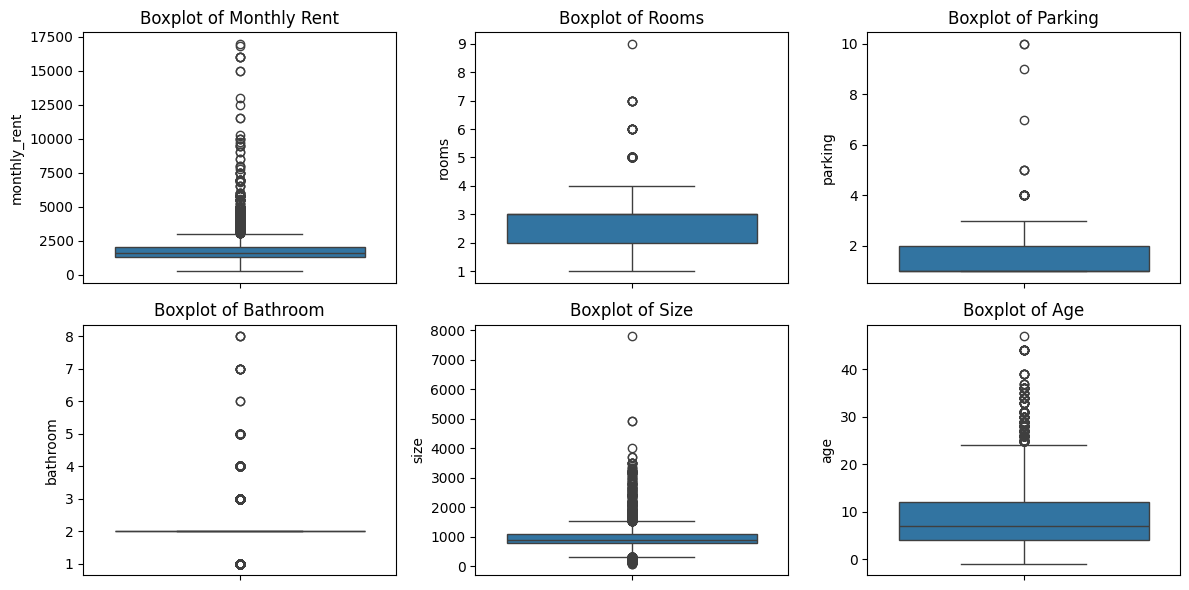

In [141]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
axes = axes.flatten()

# monthly_rent
sns.boxplot(ax=axes[0], data=df_remove_outliers, y='monthly_rent')
axes[0].set_title('Boxplot of Monthly Rent')

# rooms
sns.boxplot(ax=axes[1], data=df_remove_outliers, y='rooms')
axes[1].set_title('Boxplot of Rooms')

# parking
sns.boxplot(ax=axes[2], data=df_remove_outliers, y='parking')
axes[2].set_title('Boxplot of Parking')

# bathroom
sns.boxplot(ax=axes[3], data=df_remove_outliers, y='bathroom')
axes[3].set_title('Boxplot of Bathroom')

# size
sns.boxplot(ax=axes[4], data=df_remove_outliers, y='size')
axes[4].set_title('Boxplot of Size')

# age
sns.boxplot(ax=axes[5], data=df_remove_outliers, y='age')
axes[5].set_title('Boxplot of Age')

plt.tight_layout()
plt.show()

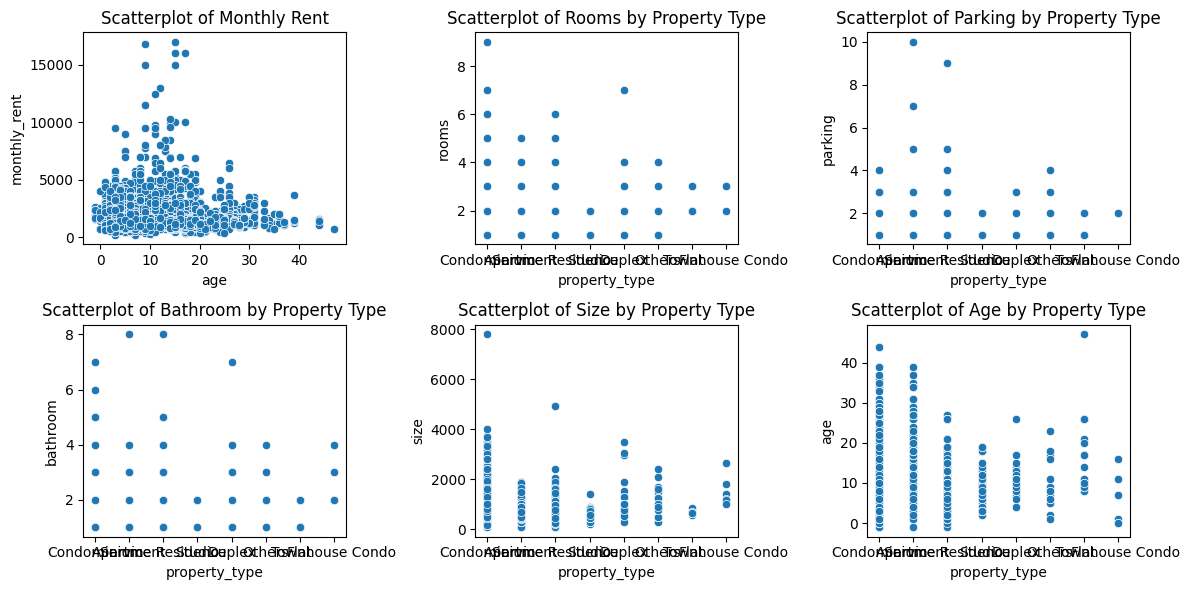

In [142]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
axes = axes.flatten()

# monthly_rent
sns.scatterplot(ax=axes[0], data=df_remove_outliers, x='age', y='monthly_rent')
axes[0].set_title('Scatterplot of Monthly Rent')

# rooms
sns.scatterplot(ax=axes[1], data=df_remove_outliers, x='property_type', y='rooms')
axes[1].set_title('Scatterplot of Rooms by Property Type')

# parking
sns.scatterplot(ax=axes[2], data=df_remove_outliers, x='property_type', y='parking')
axes[2].set_title('Scatterplot of Parking by Property Type')

# bathroom
sns.scatterplot(ax=axes[3], data=df_remove_outliers, x='property_type', y='bathroom')
axes[3].set_title('Scatterplot of Bathroom by Property Type')

# size
sns.scatterplot(ax=axes[4], data=df_remove_outliers, x='property_type', y='size')
axes[4].set_title('Scatterplot of Size by Property Type')

# age
sns.scatterplot(ax=axes[5], data=df_remove_outliers, x='property_type', y='age')
axes[5].set_title('Scatterplot of Age by Property Type')

plt.tight_layout()
plt.show()

## Feature Engineering (2)

Tasks:
1. Data Types
    - `age`: convert from Int16 to int16 (non-nullable)
2. Encoding
    - `location`: convert to mean or median monthly_rent per location
    - `property_type`: convert to mean or median monthly_rent per property_type
    - `furnished`: ordinal encode
    - `region`: ordinal encode

In [143]:
# Sanity check
df_feng2 = df_remove_outliers.copy()
df_feng2.dtypes

completion_year         Int16
monthly_rent            int32
location               object
property_type          object
rooms                    int8
parking                  int8
bathroom                 int8
size                    int16
furnished              object
region                 object
age                     Int16
missing_parking         uint8
f_minimart              uint8
f_gymnasium             uint8
f_security              uint8
f_playground            uint8
f_swimming_pool         uint8
f_parking               uint8
f_lift                  uint8
f_barbeque_area         uint8
f_multipurpose_hall     uint8
f_jogging_track         uint8
f_squash_court          uint8
f_sauna                 uint8
f_club_house            uint8
f_tennis_court          uint8
missing_facilities      uint8
a_air_cond              uint8
a_cooking_allowed       uint8
a_washing_machine       uint8
a_near_ktm_lrt          uint8
a_internet              uint8
missing_amenities       uint8
dtype: obj

### Data Types
#### `age`

In [144]:
df_feng2.age = df_feng2.age.astype('int16')

In [145]:
# Sanity check
df_feng2.dtypes

completion_year         Int16
monthly_rent            int32
location               object
property_type          object
rooms                    int8
parking                  int8
bathroom                 int8
size                    int16
furnished              object
region                 object
age                     int16
missing_parking         uint8
f_minimart              uint8
f_gymnasium             uint8
f_security              uint8
f_playground            uint8
f_swimming_pool         uint8
f_parking               uint8
f_lift                  uint8
f_barbeque_area         uint8
f_multipurpose_hall     uint8
f_jogging_track         uint8
f_squash_court          uint8
f_sauna                 uint8
f_club_house            uint8
f_tennis_court          uint8
missing_facilities      uint8
a_air_cond              uint8
a_cooking_allowed       uint8
a_washing_machine       uint8
a_near_ktm_lrt          uint8
a_internet              uint8
missing_amenities       uint8
dtype: obj

### Encoding

In [1168]:
print(df_feng2.location.unique())
print(df_feng2.property_type.unique())
print(df_feng2.furnished.unique())
print(df_feng2.region.unique())

['Kuala Lumpur - Taman Desa' 'Kuala Lumpur - Sentul'
 'Kuala Lumpur - Ampang' 'Kuala Lumpur - Segambut'
 'Kuala Lumpur - Bukit Jalil' 'Kuala Lumpur - Setapak'
 'Kuala Lumpur - KL City' 'Kuala Lumpur - Cheras'
 'Kuala Lumpur - Solaris Dutamas' 'Kuala Lumpur - Desa Pandan'
 'Kuala Lumpur - Old Klang Road' 'Kuala Lumpur - Jalan Kuching'
 'Kuala Lumpur - Ampang Hilir' 'Kuala Lumpur - Bukit Bintang'
 'Kuala Lumpur - Wangsa Maju' 'Kuala Lumpur - Gombak'
 'Kuala Lumpur - KLCC' 'Kuala Lumpur - Sungai Besi'
 'Kuala Lumpur - Kepong' 'Kuala Lumpur - Pantai'
 'Kuala Lumpur - Sri Petaling' 'Kuala Lumpur - Brickfields'
 'Kuala Lumpur - Jalan Ipoh' 'Kuala Lumpur - Kuchai Lama'
 'Kuala Lumpur - Jalan Sultan Ismail' 'Kuala Lumpur - Bangsar'
 'Kuala Lumpur - Mont Kiara' 'Kuala Lumpur - Bangsar South'
 'Kuala Lumpur - Pandan Jaya' 'Kuala Lumpur - Damansara Heights'
 'Kuala Lumpur - Bandar Damai Perdana' 'Kuala Lumpur - Titiwangsa'
 'Kuala Lumpur - Pandan Perdana' 'Kuala Lumpur - Sri Damansara'
 'Kuala Lu

#### `location`
Too many unique locations. Best option is to convert to mean/median `monthly_rent` for every unique location.

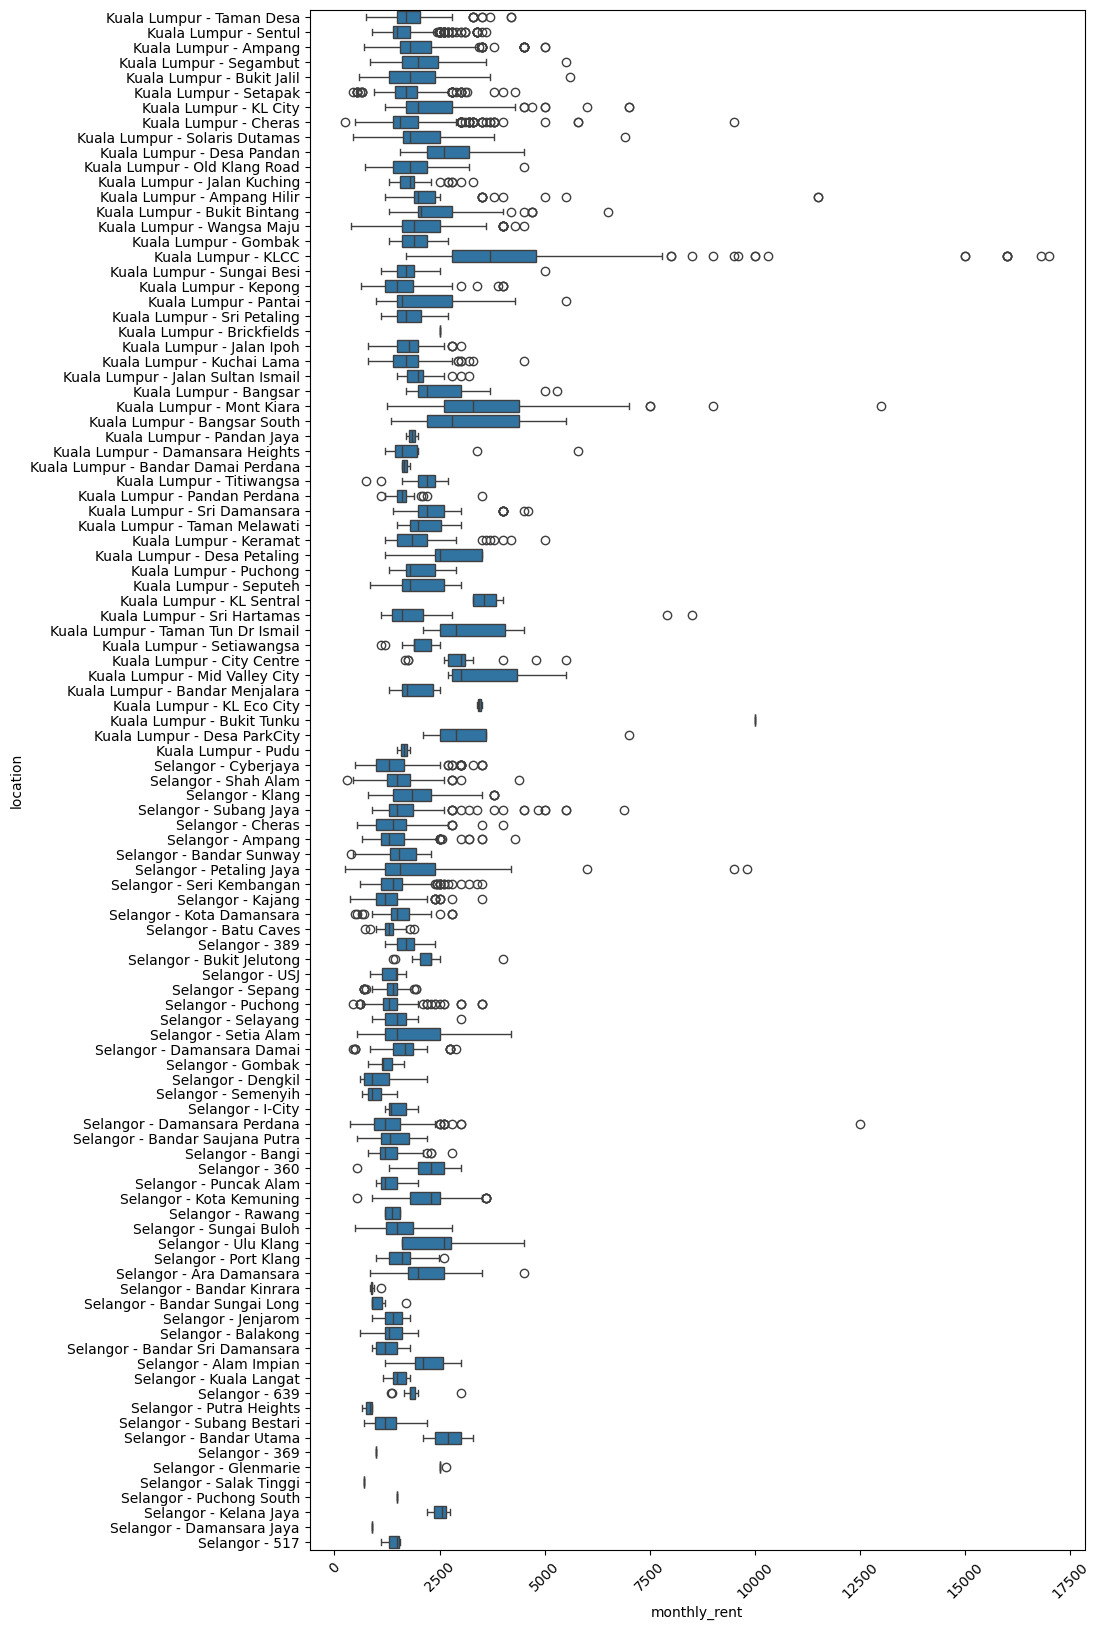

In [159]:
plt.figure(figsize=(10, 20))
sns.boxplot(data=df_feng2, x='monthly_rent', y='location', orient='h')
plt.xticks(rotation=45)
plt.show()

In [207]:
print(df_feng2.groupby('location').monthly_rent.mean())
print()
print(df_feng2.groupby('location').monthly_rent.median())

location
Kuala Lumpur - Ampang                  2040.458537
Kuala Lumpur - Ampang Hilir            2595.714286
Kuala Lumpur - Bandar Damai Perdana    1675.000000
Kuala Lumpur - Bandar Menjalara        1895.833333
Kuala Lumpur - Bangsar                 2644.117647
                                          ...     
Selangor - Subang Bestari              1279.700000
Selangor - Subang Jaya                 1845.576159
Selangor - Sungai Buloh                1510.266667
Selangor - USJ                         1355.730769
Selangor - Ulu Klang                   2357.142857
Name: monthly_rent, Length: 103, dtype: float64

location
Kuala Lumpur - Ampang                  1800.0
Kuala Lumpur - Ampang Hilir            2000.0
Kuala Lumpur - Bandar Damai Perdana    1650.0
Kuala Lumpur - Bandar Menjalara        1725.0
Kuala Lumpur - Bangsar                 2200.0
                                        ...  
Selangor - Subang Bestari              1199.0
Selangor - Subang Jaya                 1500.0
Sela

In [209]:
location_percentage = df_feng2.location.value_counts(normalize=True) * 100
print(location_percentage)

location
Kuala Lumpur - Cheras         8.796727
Selangor - Cyberjaya          6.034964
Kuala Lumpur - Sentul         5.281756
Selangor - Kajang             4.751720
Selangor - Shah Alam          4.593640
                                ...   
Kuala Lumpur - Brickfields    0.009299
Kuala Lumpur - Bukit Tunku    0.009299
Selangor - 369                0.009299
Selangor - Puchong South      0.009299
Selangor - Damansara Jaya     0.009299
Name: proportion, Length: 103, dtype: float64


In [208]:
cumulative_percentage = location_percentage.cumsum()
print(cumulative_percentage)

location
Kuala Lumpur - Cheras           8.796727
Selangor - Cyberjaya           14.831691
Kuala Lumpur - Sentul          20.113446
Selangor - Kajang              24.865166
Selangor - Shah Alam           29.458806
                                 ...    
Kuala Lumpur - Brickfields     99.962805
Kuala Lumpur - Bukit Tunku     99.972103
Selangor - 369                 99.981402
Selangor - Puchong South       99.990701
Selangor - Damansara Jaya     100.000000
Name: proportion, Length: 103, dtype: float64


Outliers skew the data, so let's use median.

In [217]:
# Copy DF
df_feng2_location = df_feng2.copy()

# Get median of every location
location_target_median = df_feng2_location.groupby('location').monthly_rent.median()

# Convert location to median
df_feng2_location['location'] = df_feng2_location['location'].map(location_target_median)
df_feng2_location

,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,region,...,f_sauna,f_club_house,f_tennis_court,missing_facilities,a_air_cond,a_cooking_allowed,a_washing_machine,a_near_ktm_lrt,a_internet,missing_amenities
0,2022,4200,1700.0,Condominium,5,2,6,1842,Fully Furnished,Kuala Lumpur,...,0,0,0,0,1,1,1,0,0,0
3,2020,1700,1500.0,Apartment,2,1,2,743,Partially Furnished,Kuala Lumpur,...,0,0,0,0,0,1,1,1,0,0
7,2018,1550,1800.0,Service Residence,1,1,1,700,Fully Furnished,Kuala Lumpur,...,0,0,0,0,1,1,1,1,0,0
8,2014,1400,2000.0,Apartment,2,1,1,750,Fully Furnished,Kuala Lumpur,...,0,0,0,0,1,1,1,1,0,0
10,2019,2600,1800.0,Service Residence,2,1,2,868,Partially Furnished,Kuala Lumpur,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19981,2009,1200,1300.0,Service Residence,2,1,2,780,Fully Furnished,Selangor,...,1,1,1,0,1,1,1,0,0,0
19983,2021,885,1300.0,Condominium,3,2,2,1015,Partially Furnished,Selangor,...,1,0,0,0,0,1,0,1,0,0
19985,2019,1500,1200.0,Service Residence,2,2,1,455,Fully Furnished,Selangor,...,0,1,0,1,1,0,0,0,0,0
19987,2018,1300,1325.0,Service Residence,4,2,3,1427,Partially Furnished,Selangor,...,1,0,1,0,1,1,0,0,0,0


#### `property_type`
OHE would work, but mean/median is a perfectly fine option as well, with the benefit of minimal dimensionality.

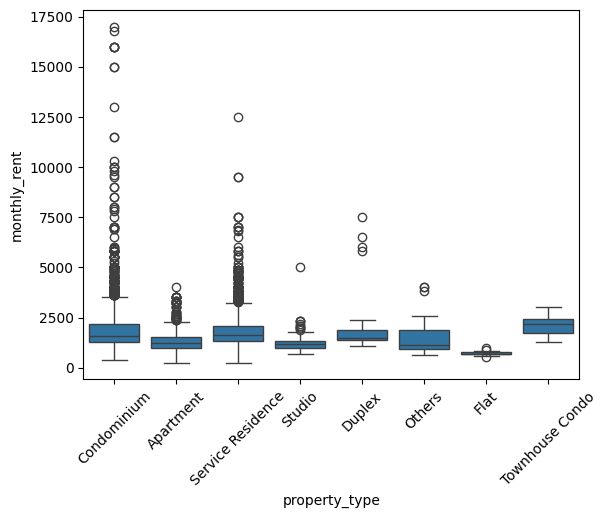

In [218]:
sns.boxplot(data=df_feng2_location, x='property_type', y='monthly_rent')
plt.xticks(rotation=45)
plt.show()

In [219]:
print(df_feng2_location.groupby('property_type').monthly_rent.mean())
print(df_feng2_location.groupby('property_type').monthly_rent.median())

property_type
Apartment            1338.722261
Condominium          1870.348980
Duplex               1907.100000
Flat                  735.400000
Others               1609.200000
Service Residence    1834.899818
Studio               1281.297872
Townhouse Condo      2133.333333
Name: monthly_rent, dtype: float64
property_type
Apartment            1250.0
Condominium          1600.0
Duplex               1500.0
Flat                  700.0
Others               1150.0
Service Residence    1650.0
Studio               1200.0
Townhouse Condo      2200.0
Name: monthly_rent, dtype: float64


There are some outliers that skew the distribution, resulting in higher means. So, let's use median for better representation rent values.

In [223]:
# Copy DF
df_feng2_property_type = df_feng2_location.copy()

# Get median of every property_type
property_type_median = df_feng2_property_type.groupby('property_type').monthly_rent.median()

# Convert location to median
df_feng2_property_type['property_type'] = df_feng2_property_type['property_type'].map(property_type_median)
df_feng2_property_type

,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,region,...,f_sauna,f_club_house,f_tennis_court,missing_facilities,a_air_cond,a_cooking_allowed,a_washing_machine,a_near_ktm_lrt,a_internet,missing_amenities
0,2022,4200,1700.0,1600.0,5,2,6,1842,Fully Furnished,Kuala Lumpur,...,0,0,0,0,1,1,1,0,0,0
3,2020,1700,1500.0,1250.0,2,1,2,743,Partially Furnished,Kuala Lumpur,...,0,0,0,0,0,1,1,1,0,0
7,2018,1550,1800.0,1650.0,1,1,1,700,Fully Furnished,Kuala Lumpur,...,0,0,0,0,1,1,1,1,0,0
8,2014,1400,2000.0,1250.0,2,1,1,750,Fully Furnished,Kuala Lumpur,...,0,0,0,0,1,1,1,1,0,0
10,2019,2600,1800.0,1650.0,2,1,2,868,Partially Furnished,Kuala Lumpur,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19981,2009,1200,1300.0,1650.0,2,1,2,780,Fully Furnished,Selangor,...,1,1,1,0,1,1,1,0,0,0
19983,2021,885,1300.0,1600.0,3,2,2,1015,Partially Furnished,Selangor,...,1,0,0,0,0,1,0,1,0,0
19985,2019,1500,1200.0,1650.0,2,2,1,455,Fully Furnished,Selangor,...,0,1,0,1,1,0,0,0,0,0
19987,2018,1300,1325.0,1650.0,4,2,3,1427,Partially Furnished,Selangor,...,1,0,1,0,1,1,0,0,0,0


#### `furnished`

Determine nominal or ordinal:
- Appears to be ordinal

In [226]:
print(df_feng2.groupby('furnished').monthly_rent.mean().sort_values())
print()
print(df_feng2.groupby('furnished').monthly_rent.median().sort_values())

furnished
Not Furnished          1206.166365
Partially Furnished    1542.169347
Fully Furnished        2062.441017
Name: monthly_rent, dtype: float64

furnished
Not Furnished          1200.0
Partially Furnished    1500.0
Fully Furnished        1800.0
Name: monthly_rent, dtype: float64


Ranking: Not Furnished (0) -> Partially Furnished (1) -> Fully Furnished (2)

In [232]:
# Copy DF
df_feng2_furnished = df_feng2_property_type.copy()

# Create mapping
furnished_map = {'Not Furnished': 0, 'Partially Furnished': 1, 'Fully Furnished': 2}

# Ordinal encode
df_feng2_furnished['furnished'] = df_feng2_furnished['furnished'].map(furnished_map).astype('int8')
df_feng2_furnished

,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,region,...,f_sauna,f_club_house,f_tennis_court,missing_facilities,a_air_cond,a_cooking_allowed,a_washing_machine,a_near_ktm_lrt,a_internet,missing_amenities
0,2022,4200,1700.0,1600.0,5,2,6,1842,2,Kuala Lumpur,...,0,0,0,0,1,1,1,0,0,0
3,2020,1700,1500.0,1250.0,2,1,2,743,1,Kuala Lumpur,...,0,0,0,0,0,1,1,1,0,0
7,2018,1550,1800.0,1650.0,1,1,1,700,2,Kuala Lumpur,...,0,0,0,0,1,1,1,1,0,0
8,2014,1400,2000.0,1250.0,2,1,1,750,2,Kuala Lumpur,...,0,0,0,0,1,1,1,1,0,0
10,2019,2600,1800.0,1650.0,2,1,2,868,1,Kuala Lumpur,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19981,2009,1200,1300.0,1650.0,2,1,2,780,2,Selangor,...,1,1,1,0,1,1,1,0,0,0
19983,2021,885,1300.0,1600.0,3,2,2,1015,1,Selangor,...,1,0,0,0,0,1,0,1,0,0
19985,2019,1500,1200.0,1650.0,2,2,1,455,2,Selangor,...,0,1,0,1,1,0,0,0,0,0
19987,2018,1300,1325.0,1650.0,4,2,3,1427,1,Selangor,...,1,0,1,0,1,1,0,0,0,0


#### `region`

Determine nominal or ordinal
- Appears to be ordinal

In [233]:
print(df_feng2.groupby('region').monthly_rent.mean())
print()
print(df_feng2.groupby('region').monthly_rent.median())

region
Kuala Lumpur    2031.133381
Selangor        1499.152684
Name: monthly_rent, dtype: float64

region
Kuala Lumpur    1800.0
Selangor        1400.0
Name: monthly_rent, dtype: float64


Ranking: Selangor (0) -> Kuala Lumpur (1)

In [236]:
# Copy DF
df_feng2_region = df_feng2_furnished.copy()

# Create mapping
region_map = {'Selangor': 0, 'Kuala Lumpur': 1}

# Ordinal encode
df_feng2_region['region'] = df_feng2_region['region'].map(region_map).astype('int8')
df_feng2_region

,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,region,...,f_sauna,f_club_house,f_tennis_court,missing_facilities,a_air_cond,a_cooking_allowed,a_washing_machine,a_near_ktm_lrt,a_internet,missing_amenities
0,2022,4200,1700.0,1600.0,5,2,6,1842,2,1,...,0,0,0,0,1,1,1,0,0,0
3,2020,1700,1500.0,1250.0,2,1,2,743,1,1,...,0,0,0,0,0,1,1,1,0,0
7,2018,1550,1800.0,1650.0,1,1,1,700,2,1,...,0,0,0,0,1,1,1,1,0,0
8,2014,1400,2000.0,1250.0,2,1,1,750,2,1,...,0,0,0,0,1,1,1,1,0,0
10,2019,2600,1800.0,1650.0,2,1,2,868,1,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19981,2009,1200,1300.0,1650.0,2,1,2,780,2,0,...,1,1,1,0,1,1,1,0,0,0
19983,2021,885,1300.0,1600.0,3,2,2,1015,1,0,...,1,0,0,0,0,1,0,1,0,0
19985,2019,1500,1200.0,1650.0,2,2,1,455,2,0,...,0,1,0,1,1,0,0,0,0,0
19987,2018,1300,1325.0,1650.0,4,2,3,1427,1,0,...,1,0,1,0,1,1,0,0,0,0


### Drop Columns

In [237]:
# Sanity check
df_feng2_done = df_feng2_region.copy()
df_feng2_done.dtypes

completion_year          Int16
monthly_rent             int32
location               float64
property_type          float64
rooms                     int8
parking                   int8
bathroom                  int8
size                     int16
furnished                 int8
region                    int8
age                      int16
missing_parking          uint8
f_minimart               uint8
f_gymnasium              uint8
f_security               uint8
f_playground             uint8
f_swimming_pool          uint8
f_parking                uint8
f_lift                   uint8
f_barbeque_area          uint8
f_multipurpose_hall      uint8
f_jogging_track          uint8
f_squash_court           uint8
f_sauna                  uint8
f_club_house             uint8
f_tennis_court           uint8
missing_facilities       uint8
a_air_cond               uint8
a_cooking_allowed        uint8
a_washing_machine        uint8
a_near_ktm_lrt           uint8
a_internet               uint8
missing_

##### `completion_year`
We don't need `completion_year` anymore

In [240]:
df_feng2_done = df_feng2_done.drop(columns=['completion_year'])
df_feng2_done.dtypes

monthly_rent             int32
location               float64
property_type          float64
rooms                     int8
parking                   int8
bathroom                  int8
size                     int16
furnished                 int8
region                    int8
age                      int16
missing_parking          uint8
f_minimart               uint8
f_gymnasium              uint8
f_security               uint8
f_playground             uint8
f_swimming_pool          uint8
f_parking                uint8
f_lift                   uint8
f_barbeque_area          uint8
f_multipurpose_hall      uint8
f_jogging_track          uint8
f_squash_court           uint8
f_sauna                  uint8
f_club_house             uint8
f_tennis_court           uint8
missing_facilities       uint8
a_air_cond               uint8
a_cooking_allowed        uint8
a_washing_machine        uint8
a_near_ktm_lrt           uint8
a_internet               uint8
missing_amenities        uint8
dtype: o

# Feature Selection

Export dataset checkpoint

In [382]:
df_feng2_done.to_csv('../data/processed/rental_pricing_kl_selangor.csv', index=False)

## Collinearity Analysis

Findings: no excessively high collinearity

In [274]:
numerical_cols = ['monthly_rent', 'rooms', 'parking', 'bathroom', 'size', 'age', 'missing_parking']
categorical_cols = ['monthly_rent', 'location', 'property_type', 'furnished', 'region']
binary_f_cols = ['monthly_rent', 'f_minimart', 'f_gymnasium', 'f_security', 'f_playground', 'f_swimming_pool', 'f_parking', 'f_lift', 'f_barbeque_area',
               'f_multipurpose_hall', 'f_jogging_track', 'f_squash_court', 'f_sauna', 'f_club_house', 'f_tennis_court', 'missing_facilities']
binary_a_cols = ['monthly_rent', 'a_air_cond', 'a_cooking_allowed', 'a_washing_machine', 'a_near_ktm_lrt', 'a_internet', 'missing_amenities']

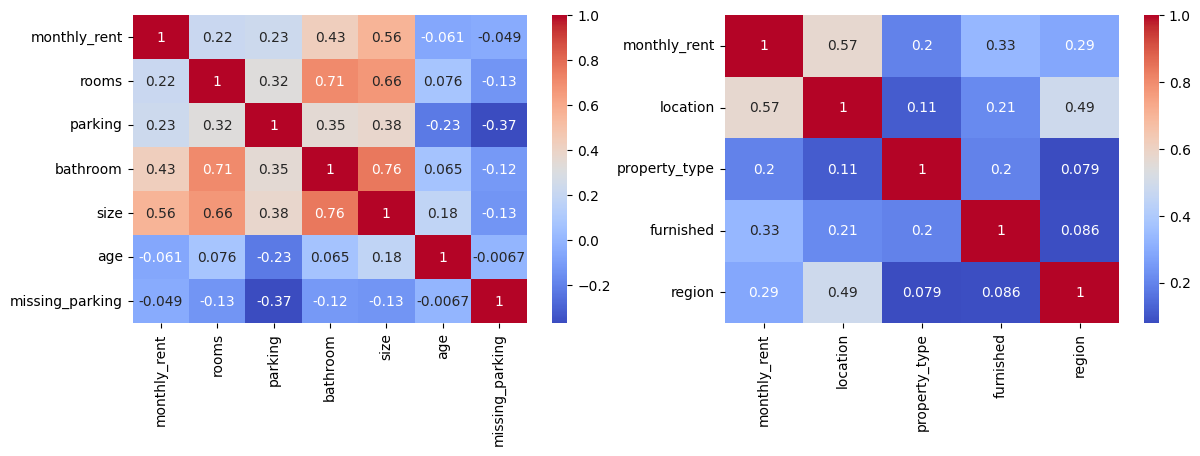

In [268]:
corr_num = df_feng2_done[numerical_cols].corr()
corr_cat = df_feng2_done[categorical_cols].corr()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
axes = axes.flatten()

sns.heatmap(corr_num, annot=True, cmap='coolwarm', ax=axes[0])
sns.heatmap(corr_cat, annot=True, cmap='coolwarm', ax=axes[1])

plt.show()

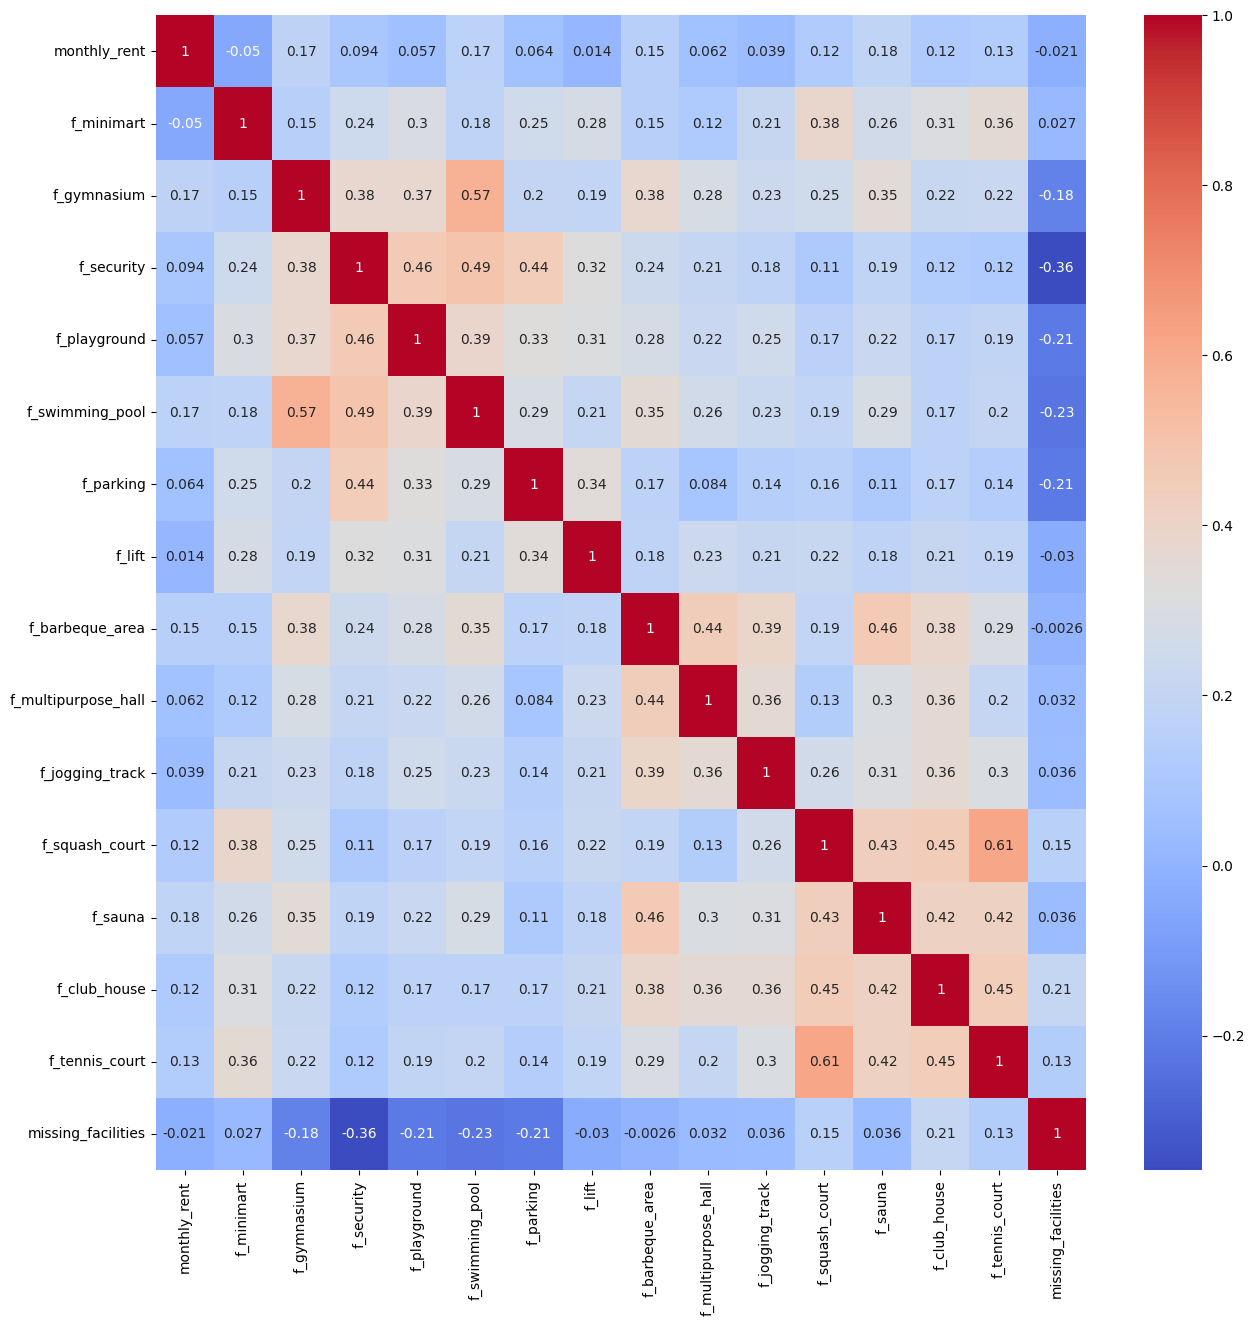

In [278]:
corr_bin_f = df_feng2_done[binary_f_cols].corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_bin_f, annot=True, cmap='coolwarm')
plt.show()

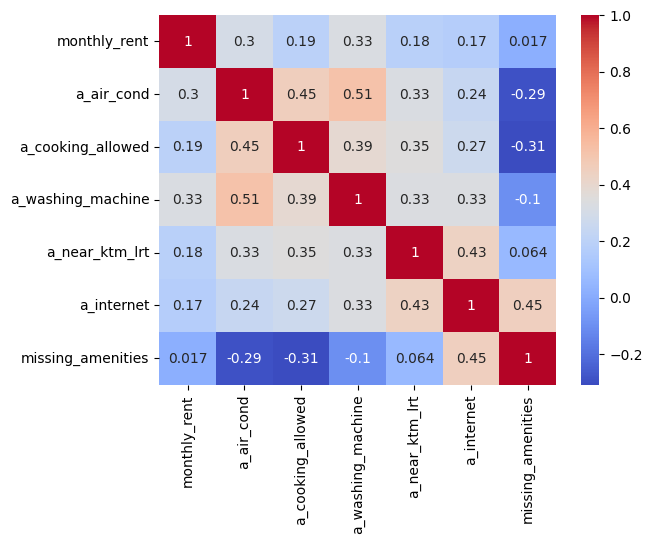

In [280]:
corr_bin_a = df_feng2_done[binary_a_cols].corr()
sns.heatmap(corr_bin_a, annot=True, cmap='coolwarm')
plt.show()

## ANOVA Correlation Test

In [320]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

target_var = 'monthly_rent'

formula_num = 'monthly_rent ~ C(rooms) + C(parking) + C(bathroom) + C(size) + C(age) + C(missing_parking)'
formula_cat = 'monthly_rent ~ C(location) + C(property_type) + C(furnished) + C(region)'
formula_bin_f = 'monthly_rent ~ C(f_minimart) + C(f_gymnasium) + C(f_security) + C(f_playground) + C(f_swimming_pool) + C(f_parking) + C(f_lift) + C(f_barbeque_area) + C(f_multipurpose_hall) + C(f_jogging_track) + C(f_squash_court) + C(f_sauna) + C(f_club_house) + C(f_tennis_court) + C(missing_facilities)'
formula_bin_a = 'monthly_rent ~ C(a_air_cond) + C(a_cooking_allowed) + C(a_washing_machine) + C(a_near_ktm_lrt) + C(a_internet) + C(missing_amenities)'

# Fit the model
model1 = ols(formula_num, data=df_feng2_done).fit()
model2 = ols(formula_cat, data=df_feng2_done).fit()
model3 = ols(formula_bin_f, data=df_feng2_done).fit()
model4 = ols(formula_bin_a, data=df_feng2_done).fit()

# Perform ANOVA
anova_table1 = sm.stats.anova_lm(model1, typ=2)
anova_table2 = sm.stats.anova_lm(model2, typ=2)
anova_table3 = sm.stats.anova_lm(model3, typ=2)
anova_table4 = sm.stats.anova_lm(model4, typ=2)

In [321]:
# Print ANOVA tables
print(anova_table1)
print()
print(anova_table2)
print()
print(anova_table3)
print()
print(anova_table4)

                          sum_sq      df          F         PR(>F)
C(rooms)            1.782923e+08     7.0  91.365529  1.518809e-129
C(parking)          7.845246e+06     7.0   4.020281   2.101584e-04
C(bathroom)         1.072254e+08     7.0  54.947440   1.750985e-77
C(size)             3.772416e+09   988.0  13.696529   0.000000e+00
C(age)              2.617939e+08    40.0  23.477261  2.004103e-162
C(missing_parking)  2.152602e+03     1.0   0.007722   9.299794e-01
Residual            2.705222e+09  9704.0        NaN            NaN

                        sum_sq       df           F         PR(>F)
C(location)       1.915221e+09     45.0   81.294329   0.000000e+00
C(property_type)  1.400784e+08      7.0   38.223198   2.456464e-53
C(furnished)      3.627488e+08      2.0  346.441524  1.637111e-146
C(region)         1.120704e+04      1.0    0.021406   8.836799e-01
Residual          5.600781e+09  10698.0         NaN            NaN

                              sum_sq       df           F   

Assume P-value threshold = 0.05\
Findings:
- `missing_parking`: 0.09, above threshold but it is used to indicate missingness of parking, so we keep it
- `region`: 0.08, above threshold mean/median calculations clearly showed difference, so we keep it for now
- `missing_facilities`: 0.07, above threshold but it is used to indicate missingness of facilities, so we keep it
- everything else is below threshold

## Distribution Analysis

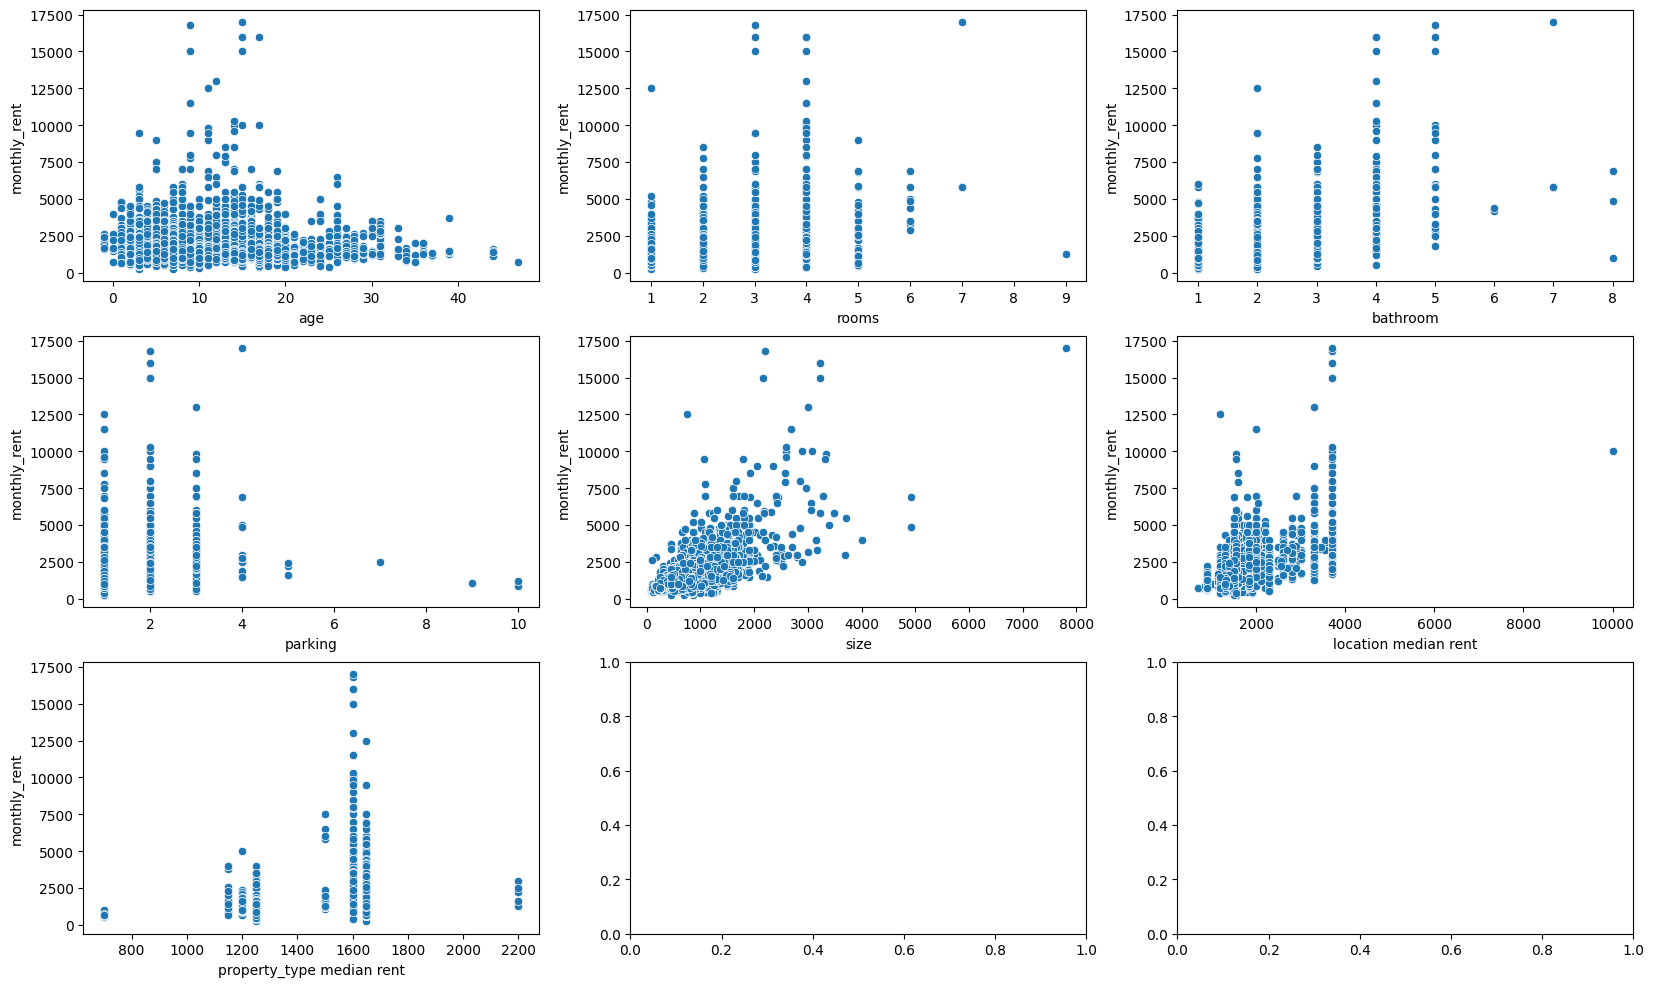

In [297]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 12))
axes = axes.flatten()

sns.scatterplot(df_feng2_done, x='age', y='monthly_rent', ax=axes[0])
sns.scatterplot(df_feng2_done, x='rooms', y='monthly_rent', ax=axes[1])
sns.scatterplot(df_feng2_done, x='bathroom', y='monthly_rent', ax=axes[2])
sns.scatterplot(df_feng2_done, x='parking', y='monthly_rent', ax=axes[3])
sns.scatterplot(df_feng2_done, x='size', y='monthly_rent', ax=axes[4])

sns.scatterplot(df_feng2_done, x='location', y='monthly_rent', ax=axes[5])
axes[5].set_xlabel('location median rent')

sns.scatterplot(df_feng2_done, x='property_type', y='monthly_rent', ax=axes[6])
axes[6].set_xlabel('property_type median rent')

plt.show()

# Feature Scaling

Numerical features:
1. `rooms`
1. `parking`
1. `bathroom`
1. `size`
1.  `age`

Check for normal distribution

## QQ Plots

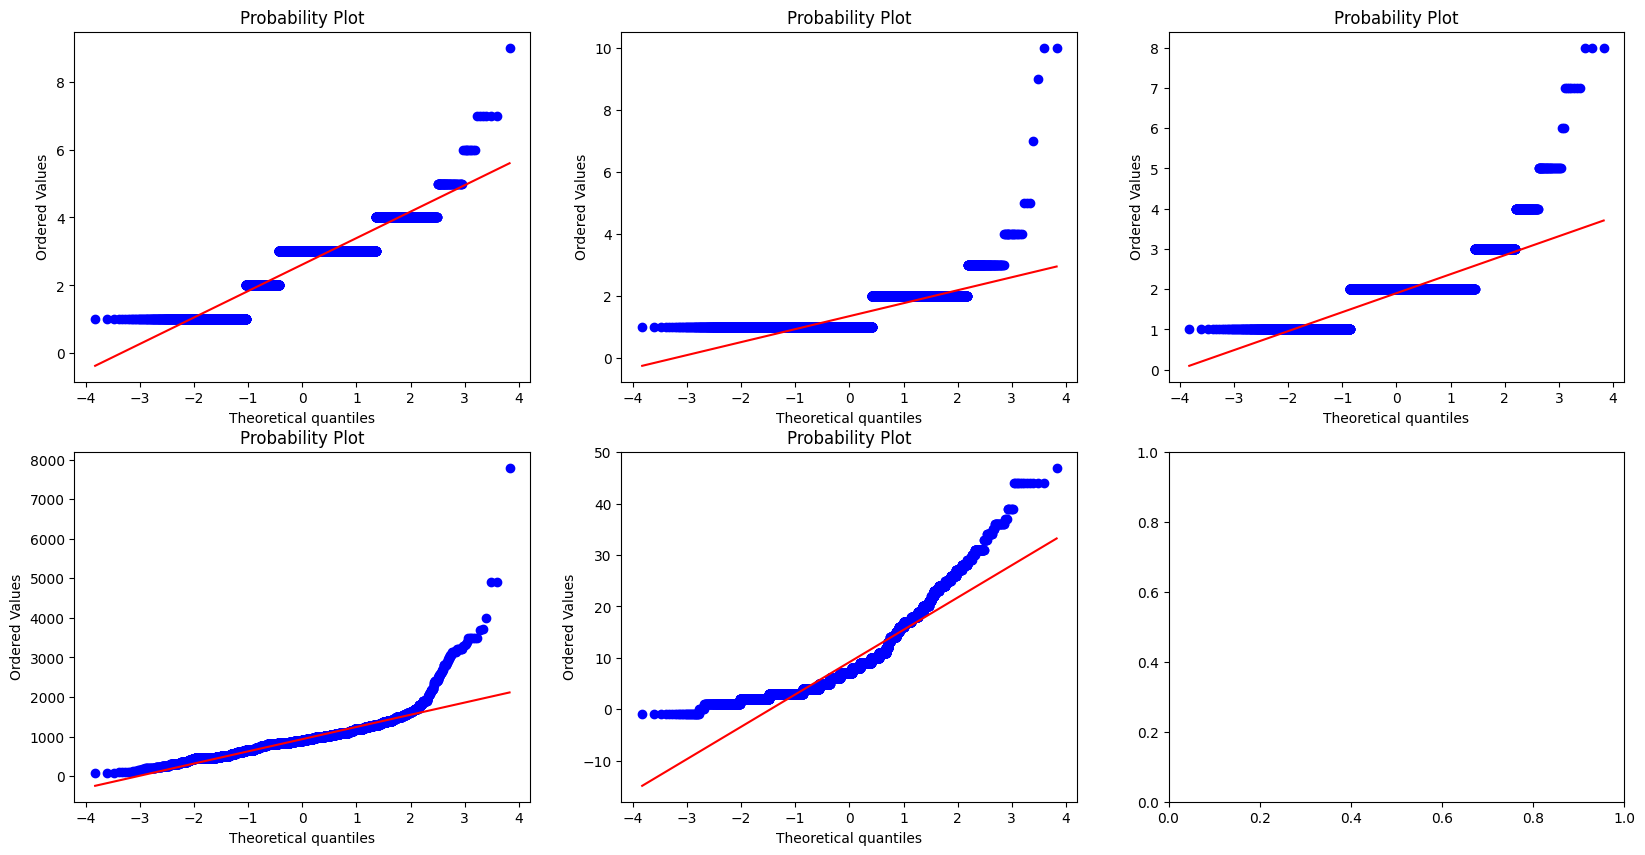

In [336]:
import scipy.stats as stats

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axes = axes.flatten()

stats.probplot(df_feng2_done['rooms'], dist="norm", plot=axes[0])
stats.probplot(df_feng2_done['parking'], dist="norm", plot=axes[1])
stats.probplot(df_feng2_done['bathroom'], dist="norm", plot=axes[2])
stats.probplot(df_feng2_done['size'], dist="norm", plot=axes[3])
stats.probplot(df_feng2_done['age'], dist="norm", plot=axes[4])

plt.show()

## Shapiro-Wilk Test

In [359]:
from scipy.stats import shapiro

stat1, p_value1 = shapiro(df_feng2_done['rooms'])
stat2, p_value2 = shapiro(df_feng2_done['parking'])
stat3, p_value3 = shapiro(df_feng2_done['bathroom'])
stat4, p_value4 = shapiro(df_feng2_done['size'])
stat5, p_value5 = shapiro(df_feng2_done['age'])

print(f'rooms    {stat1}  {p_value1}')
print(f'parking    {stat2}  {p_value2}')
print(f'bathroom    {stat3}  {p_value3}')
print(f'size    {stat4}  {p_value4}')
print(f'age    {stat5}  {p_value5}')

rooms    0.8098577119571083  4.117002277371626e-77
parking    0.6045038607178954  8.092522210687991e-94
bathroom    0.6513371829896386  7.984471114534745e-91
size    0.8438082104209214  6.556145672958137e-73
age    0.871947496797151  8.673547092161599e-69


c:\Users\wztho\Desktop\College Folder\Degree\Semester 4 (AUG2024)\6006CEM Machine Learning and Related Applications\Assignment\6006cem-ml\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10754.
  res = hypotest_fun_out(*samples, **kwds)


Findings: None of the numerical features are Gaussian/normal distributions. So, we either use MinMaxScaler or RobustScaler to normalize the values.

## Verify Scaling

Let's verify scaling results.

In [379]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler

num_features = ['rooms', 'parking', 'bathroom', 'size', 'age']

X = df_feng2_done.drop('monthly_rent', axis=1)  # Features
y = df_feng2_done['monthly_rent']               # Target

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler_X = MinMaxScaler().set_output(transform='pandas')
X_train[num_features] = scaler_X.fit_transform(X_train[num_features])
X_test[num_features] = scaler_X.transform(X_test[num_features])

In [380]:
X_train

,location,property_type,rooms,parking,bathroom,size,furnished,region,age,missing_parking,...,f_sauna,f_club_house,f_tennis_court,missing_facilities,a_air_cond,a_cooking_allowed,a_washing_machine,a_near_ktm_lrt,a_internet,missing_amenities
17639,1150.0,1250.0,0.250,0.000000,0.142857,0.095466,1,0,0.333333,1,...,0,0,0,0,1,1,0,0,0,0
19351,1400.0,1600.0,0.250,0.111111,0.142857,0.095596,2,0,0.104167,0,...,0,0,0,0,1,1,1,0,0,0
7712,1550.0,1500.0,0.375,0.000000,0.285714,0.189896,1,1,0.333333,1,...,0,0,0,0,1,1,1,1,0,1
652,1500.0,1600.0,0.000,0.000000,0.000000,0.034974,2,1,0.166667,1,...,1,1,1,1,1,1,1,1,1,1
859,2000.0,1600.0,0.250,0.000000,0.142857,0.125518,2,1,0.375000,0,...,1,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10288,1400.0,1650.0,0.250,0.111111,0.142857,0.119171,1,0,0.145833,0,...,1,0,0,0,1,1,0,1,0,0
9265,1500.0,1650.0,0.250,0.000000,0.142857,0.099741,2,1,0.083333,1,...,1,1,1,0,1,1,1,1,1,0
9608,1500.0,1600.0,0.250,0.000000,0.142857,0.093264,1,1,0.104167,0,...,0,0,0,0,0,1,0,1,0,0
1571,1500.0,1650.0,0.250,0.000000,0.142857,0.099741,2,1,0.083333,0,...,0,0,0,0,0,0,1,0,0,0


In [381]:
X_test

,location,property_type,rooms,parking,bathroom,size,furnished,region,age,missing_parking,...,f_sauna,f_club_house,f_tennis_court,missing_facilities,a_air_cond,a_cooking_allowed,a_washing_machine,a_near_ktm_lrt,a_internet,missing_amenities
16669,1850.0,1650.0,0.250,0.000000,0.142857,0.104016,1,0,0.145833,1,...,1,1,0,0,1,1,1,1,1,1
2718,1700.0,1600.0,0.250,0.111111,0.142857,0.127720,2,1,0.375000,0,...,1,1,1,0,1,1,1,1,1,0
10883,1300.0,1650.0,0.000,0.000000,0.000000,0.047927,2,0,0.208333,1,...,0,0,0,0,1,0,1,1,0,0
19921,1300.0,1250.0,0.000,0.000000,0.000000,0.054404,2,0,0.145833,0,...,0,0,0,0,1,1,1,0,0,0
18926,1400.0,1600.0,0.250,0.111111,0.142857,0.095596,1,0,0.104167,0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,2000.0,1600.0,0.000,0.000000,0.000000,0.028497,2,1,0.104167,1,...,0,0,0,0,1,1,1,1,1,0
9975,1550.0,1600.0,0.125,0.111111,0.142857,0.106218,2,1,0.208333,0,...,1,1,1,0,1,1,1,1,1,0
9861,1500.0,1600.0,0.125,0.000000,0.142857,0.090026,1,1,0.125000,0,...,1,1,1,0,0,1,0,0,0,0
14331,1550.0,1600.0,0.250,0.000000,0.142857,0.117358,2,0,0.250000,0,...,0,0,0,0,1,1,1,1,1,1
